### Visualising the data

#### What files are in the input folder:

In [1]:
# All imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import gc


In [2]:
import os 
print('No. of files: {}'.format(str(len(os.listdir("./input")))))
print(os.listdir("./input"))

No. of files: 3
['sample_submission.csv', 'test.csv', 'train.csv']


##### Train and Test files

In [3]:
#Loading Train and Test Data

df_train = pd.read_csv("./input/train.csv")
df_test = pd.read_csv("./input/test.csv")

print("{} observations and {} features in train set.".format(df_train.shape[0], df_train.shape[1]))
print("{} observations and {} features in test set.".format(df_test.shape[0], df_test.shape[1]))

200000 observations and 202 features in train set.
200000 observations and 201 features in test set.


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [7]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


Let's now look at the target score 

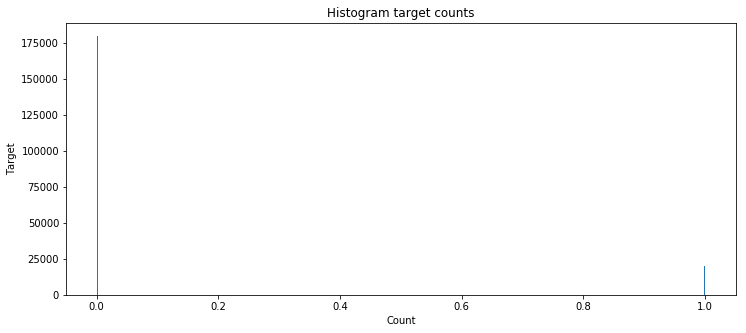

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(df_train.target.values, bins=500)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

In [9]:
df_train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Let's centre and normalise the data

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_transformed_train = scaler.fit_transform(df_train.iloc[:,2:])
x_transformed_test = scaler.transform(df_test.iloc[:,1:])

Let's split the data in train and test data

In [15]:
from sklearn.model_selection import train_test_split

x = x_transformed_train
y = df_train['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, test_size = 0.2)

pd.DataFrame(data=x_train).head(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-1.569719,-1.573611,-0.217840,0.634005,1.300849,0.283308,-0.013673,0.817406,0.513451,0.666736,...,-1.854519,-0.250361,-0.189485,-0.900615,0.351790,-1.321151,-0.115015,0.763590,0.270042,0.397331
1,1.041658,1.305056,0.680797,-0.581570,-0.162976,0.764139,0.678569,-0.204311,0.716384,1.036433,...,0.731936,1.415983,1.135038,0.035377,0.319670,-0.663728,1.074749,1.193701,0.232977,-0.600543
2,0.322326,-0.509546,-0.493922,-0.753203,-1.561680,1.260754,0.324313,-1.484713,1.036852,-0.456280,...,-0.527124,-0.585860,1.535127,-0.549014,0.721309,0.933691,-0.497187,1.331284,0.356693,0.436860


In [16]:
pd.DataFrame(data=x_test).head(3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.139049,0.968269,-0.606043,0.562405,-0.779310,-1.529557,-0.388238,-0.462381,0.776906,-1.138753,...,2.023101,-0.830330,0.407774,0.484849,0.600390,-0.689543,-1.750534,1.025194,0.706052,-1.672388
1,0.482061,1.051108,-0.128325,0.709568,-0.146649,-1.568230,1.454009,0.179502,0.648569,1.526851,...,1.292758,-1.641804,-0.288780,0.735799,-1.444453,-0.896068,-2.000939,0.319157,0.480408,0.322067
2,2.443053,0.726049,-0.476087,-1.699117,0.225714,-1.481714,0.756228,-1.080655,0.585646,-0.134759,...,-0.645921,-0.413298,-0.442052,1.108343,1.391197,-1.106790,0.373622,-0.456323,0.231217,-0.475950


In [17]:
y_train.describe()

count    160000.000000
mean          0.100163
std           0.300217
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

In [18]:
pd.DataFrame(data=y_test).head(3)

,target
55460,0
191859,1
46956,0


In [19]:
neg = len(x_train[(y_train==0)])
pos = len(x_train[(y_train==1)])
print('Value list length having target = 0: {} and having target 1: {}\n'.format(neg, pos)) 

for i in range(2):
    print('var_{} values having target = 0: {}'.format(i, x_train[(y_train==0),i]))
    print('-----------------')
    print('var_{} values having target = 1: {}'.format(i, x_train[(y_train==1),i]))
    print('******************')
    


Value list length having target = 0: 143974 and having target 1: 16026

var_0 values having target = 0: [-1.56971919  1.04165812  0.32232625 ...  1.95355303 -0.81255891
  0.23176833]
-----------------
var_0 values having target = 1: [-0.59226599 -0.66542285 -0.80818397 ... -1.16965909 -0.14865389
  0.47791614]
******************
var_1 values having target = 0: [-1.57361104  1.30505611 -0.50954591 ...  0.14425106 -0.74026002
 -1.77960931]
-----------------
var_1 values having target = 1: [-0.42087999  0.10425139 -1.92689202 ...  0.68755513 -0.01579698
  0.90209653]
******************


E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


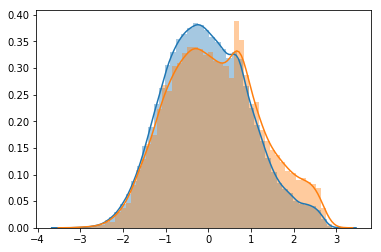

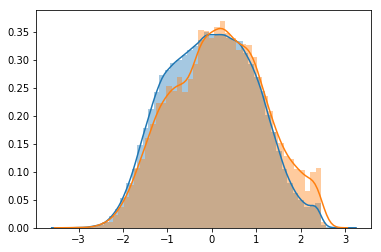

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Just show the first two columns var_0 and var_1
for i in range(2):
    ax1 = sns.distplot(x_train[(y_train==0),i])
    ax2 = sns.distplot(x_train[(y_train==1),i])
    plt.show()

#### XGBoost

In [ ]:
from xgboost.sklearn import XGBClassifier

scale_pos_weight  = float(neg/pos)
XGB = XGBClassifier(scale_pos_weight=scale_pos_weight,
                        objective='binary:logistic',
                        random_state= 21,
                        learning_rate = 0.1,
                        n_estimators = 100,
                        tree_depth= 3
                    )
XGB.fit(x_train, y_train)

In [ ]:
y_preds = XGB.predict_proba(x_test)

In [ ]:
probs_pos_XGB  = []
for pred in y_preds:
    probs_pos_XGB.append(pred[1])

In [ ]:
roc_gnb = roc_auc_score(y_test,probs_pos_XGB)
print(roc_gnb)

In [ ]:
def create_submission_file(filename):
    submission = pd.DataFrame(columns = ['ID_code','Target'])
    submission['ID_code']= test['ID_code'] 
    submission['Target'] = sub_combined_preds
    return submission.to_csv(filename,index=False)

#### GNB

In [21]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

In [22]:
GNB.fit(x_train, y_train)
y_preds_test = GNB.predict_proba(x_test)
print(y_preds_test[:10])

[[0.9976797  0.0023203 ]
 [0.75185677 0.24814323]
 [0.99146547 0.00853453]
 [0.82813963 0.17186037]
 [0.50619194 0.49380806]
 [0.96968532 0.03031468]
 [0.9950827  0.0049173 ]
 [0.95779733 0.04220267]
 [0.99342305 0.00657695]
 [0.99622528 0.00377472]]


In [23]:
from sklearn.metrics import roc_auc_score 

probs_pos_test_gnb  = []
for pred in y_preds_test:
    probs_pos_test_gnb.append(pred[1])
    
roc_test = roc_auc_score(y_test, probs_pos_test_gnb)
print(roc_test)

0.8884259049642617


#### LGB

In [131]:
from lightgbm import LGBMRegressor, LGBMClassifier

# learning_rate': 0.008, n_estimators = 2000, commented out settings 1. --> 0.8836
# learning_rate': 0.05, n_estimators = 2000, commented out settings 2. --> 0.8867
# learning_rate': 0.07, n_estimators = 6000, commented out settings 2. --> 0.8649
# learning_rate': 0.03, n_estimators = 2000, commented out settings 3. --> 0.8768
# learning_rate': 0.03, n_estimators = 2000, commented out settings 4. --> 0.8851
# learning_rate': 0.03, n_estimators = 2000, commented out settings 4. with gamma dist --> 0.8019
# learning_rate': 0.03, n_estimators = 2000, commented out settings 5. with binary dist --> 0.8929
# learning_rate': 0.03, n_estimators = 2000, commented out settings 5. with binary dist + classifier model --> 0.8930
# learning_rate': 0.05, n_estimators = 2000, commented out settings 6. with binary dist + classifier model --> 0.8585
# learning_rate': 0.02, n_estimators = 4000, commented out settings 7. with binary dist + classifier model --> 0.8950


# 7
LGB_params = {'num_leaves': 255,
         'objective': 'binary',
         'learning_rate': 0.02,
         'metric': 'rmse',
         'max_bin': 120,
         'num_iterations': 4000,
         'boosting': 'gbdt'}

#6
#LGB_params = {'num_leaves': 255,
#         'min_data_in_leaf': 0,
#         'objective': 'regression',
#         'max_depth': 13,
#         'learning_rate': 0.05,
#         "boosting": "gbdt",
#         "feature_fraction": 0.8,
#         "bagging_freq": 7,
#         "bagging_fraction": 0.8,
#         "bagging_seed": 11,
#         "metric": 'rmse',
#         "lambda_l1": 0.1,
#         "verbosity": -1,
#         'min_child_weight': 5,
#         'reg_alpha': 1.15,
#         'reg_lambda': 0.25,
#         'subsample': 0.80,
#         'max_bin': 120}

# 5
#LGB_params = {'num_leaves': 255,
#         'objective': 'binary',
#         'learning_rate': 0.03,
#         'metric': 'rmse',
#         'max_bin': 120,
#         'num_iterations': 2000,
#         'boosting': 'gbdt'}

# 4
#LGB_params = {'num_leaves': 60,
#         'objective': 'regression',
#         'learning_rate': 0.03,
#         'metric': 'rmse',
#         'max_bin': 120,
#         'num_iterations': 2000,
#         'boosting': 'gbdt'}

# 3
#LGB_params = {'num_leaves': 60,
#         'objective': 'regression',
#         'learning_rate': 0.03,
#         'metric': 'rmse',
#         'max_bin': 120,
#         'num_iterations': 2000,
#         'boosting': 'dart'}

# 2
#LGB_params = {'num_leaves': 40,
#         'min_data_in_leaf': 50,
#         'objective': 'regression',
#         'max_depth': 9,
#         'learning_rate': 0.07,
#         "boosting": "gbdt",
#         "feature_fraction": 0.7,
#         "bagging_freq": 7,
#         "bagging_fraction": 0.7,
#         "bagging_seed": 11,
#         "metric": 'rmse',
#         "lambda_l1": 0.1,
#         "verbosity": -1,
#         'min_child_weight': 5,
#         'reg_alpha': 1.15,
#         'reg_lambda': 0.25,
#         'subsample': 0.80,}

# 1. LGB_params = {'num_leaves': 50,
#         'min_data_in_leaf': 70,
#         'objective': 'regression',
#         'max_depth': 13,
#         'learning_rate': 0.008,
#         "boosting": "gbdt",
#         "feature_fraction": 0.8,
#         "bagging_freq": 7,
#         "bagging_fraction": 0.8,
#         "bagging_seed": 11,
#         "metric": 'rmse',
#         "lambda_l1": 0.1,
#         "verbosity": -1,
#         'min_child_weight': 5,
#         'reg_alpha': 1.15,
#         'reg_lambda': 0.25,
#         'subsample': 0.80,}

#LGB = LGBMRegressor(**LGB_params, n_estimators = 2000, nthread = 4, n_jobs = -1)

LGB = LGBMClassifier(**LGB_params, n_estimators = 2000, nthread = 4, n_jobs = -1)

In [132]:
LGB.fit(x_train, y_train, eval_metric='rmse', verbose=1000)


E:\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(boosting='gbdt', boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, importance_type='split', learning_rate=0.02,
        max_bin=120, max_depth=-1, metric='rmse', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=2000,
        n_jobs=-1, nthread=4, num_iterations=4000, num_leaves=255,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [133]:
y_pred = LGB.predict_proba(x_test) # for classifier
#y_pred = LGB.predict(x_test) # for regression
print(y_pred[:10])
#print(min(y_pred))
#print(max(y_pred))



[[9.99995784e-01 4.21645202e-06]
 [9.78157092e-01 2.18429079e-02]
 [9.99987654e-01 1.23456181e-05]
 [9.88159643e-01 1.18403572e-02]
 [7.01915838e-01 2.98084162e-01]
 [9.99969970e-01 3.00299192e-05]
 [9.99997868e-01 2.13236020e-06]
 [9.99914635e-01 8.53654077e-05]
 [9.99999125e-01 8.74983379e-07]
 [9.99999820e-01 1.79770111e-07]]


In [134]:
#print(y_pred[:, 1:])
roc_test = roc_auc_score(y_test, y_pred[:, 1:].clip(0, 1))
print(roc_test)
# got 0.8846161338721976 with LGBMClassifier and LGB.predict_proba(x_test)

0.8950235523437182


#### LGB Cross validation

In [33]:
LGB_cross = LGBMRegressor(**LGB_params, n_estimators = 2000, nthread = 4, n_jobs = -1)


In [34]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(LGB_cross, x, y, cv=3)

In [40]:
roc_test = roc_auc_score(y, y_pred.clip(0, 1))
print(roc_test)

0.8802885989057947


#### CAT

In [190]:
import catboost

# done of param set #1
# learning_rate': 0.03, iter: 400  --> 0.8721
# learning_rate': 0.008, iter: 400  --> 0.8299
# learning_rate': 0.1, iter: 400  --> 0.8867
# learning_rate': 0.07, iter: 800  --> 0.8901
# learning_rate': 0.07, iter: 1600  --> 0.8911

# learning_rate': 0.02, depth:7, iter: 3000  --> 0.8981
# learning_rate': 0.01, depth:7, iter: 5000, od_type='Iter', bootstrap_type='Bernoulli'  --> 0.8965

# 1
#CAT_params = {'learning_rate': 0.07,
#              'depth': 9,
#              'l2_leaf_reg': 8,
#              'bootstrap_type': 'Bernoulli',
#              'od_type': 'Iter',
#              'od_wait': 10,
#              'random_seed': 11,
#              'allow_writing_files': False}

#CAT = catboost.CatBoostRegressor(iterations=1600,  eval_metric='RMSE', **CAT_params)

#CAT = catboost.CatBoostClassifier(iterations=300,  eval_metric='RMSE', **CAT_params)
# THE BEST catboost.CatBoostClassifier(iterations=3000, learning_rate=0.02, depth=7)
CAT = catboost.CatBoostClassifier(iterations=5000, learning_rate=0.01, depth=7, od_type='Iter', bootstrap_type='Bernoulli')


In [191]:
CAT.fit(x_train, y_train, verbose=True)

0:	learn: 0.6842934	total: 190ms	remaining: 15m 50s
1:	learn: 0.6756071	total: 353ms	remaining: 14m 42s
2:	learn: 0.6670471	total: 505ms	remaining: 14m 1s
3:	learn: 0.6587731	total: 677ms	remaining: 14m 6s
4:	learn: 0.6507434	total: 854ms	remaining: 14m 12s
5:	learn: 0.6428541	total: 1.03s	remaining: 14m 15s
6:	learn: 0.6351943	total: 1.19s	remaining: 14m 5s
7:	learn: 0.6276982	total: 1.34s	remaining: 13m 58s
8:	learn: 0.6203473	total: 1.5s	remaining: 13m 50s
9:	learn: 0.6132337	total: 1.7s	remaining: 14m 6s
10:	learn: 0.6061939	total: 1.88s	remaining: 14m 12s
11:	learn: 0.5994117	total: 2.03s	remaining: 14m 5s
12:	learn: 0.5926954	total: 2.17s	remaining: 13m 53s
13:	learn: 0.5862113	total: 2.34s	remaining: 13m 54s
14:	learn: 0.5798299	total: 2.5s	remaining: 13m 50s
15:	learn: 0.5736298	total: 2.67s	remaining: 13m 50s
16:	learn: 0.5675893	total: 2.84s	remaining: 13m 51s
17:	learn: 0.5615405	total: 3s	remaining: 13m 51s
18:	learn: 0.5557957	total: 3.16s	remaining: 13m 48s
19:	learn: 0.5

157:	learn: 0.3117177	total: 24s	remaining: 12m 14s
158:	learn: 0.3113511	total: 24.1s	remaining: 12m 14s
159:	learn: 0.3109964	total: 24.3s	remaining: 12m 13s
160:	learn: 0.3106632	total: 24.4s	remaining: 12m 13s
161:	learn: 0.3103104	total: 24.5s	remaining: 12m 12s
162:	learn: 0.3099626	total: 24.7s	remaining: 12m 12s
163:	learn: 0.3096227	total: 24.8s	remaining: 12m 11s
164:	learn: 0.3092965	total: 25s	remaining: 12m 11s
165:	learn: 0.3089702	total: 25.1s	remaining: 12m 11s
166:	learn: 0.3086575	total: 25.2s	remaining: 12m 10s
167:	learn: 0.3083646	total: 25.4s	remaining: 12m 9s
168:	learn: 0.3080366	total: 25.5s	remaining: 12m 9s
169:	learn: 0.3077240	total: 25.7s	remaining: 12m 8s
170:	learn: 0.3074182	total: 25.8s	remaining: 12m 8s
171:	learn: 0.3070983	total: 25.9s	remaining: 12m 7s
172:	learn: 0.3068058	total: 26.1s	remaining: 12m 7s
173:	learn: 0.3065260	total: 26.2s	remaining: 12m 6s
174:	learn: 0.3062240	total: 26.3s	remaining: 12m 6s
175:	learn: 0.3059392	total: 26.5s	remai

311:	learn: 0.2838485	total: 45.1s	remaining: 11m 17s
312:	learn: 0.2837343	total: 45.2s	remaining: 11m 17s
313:	learn: 0.2836293	total: 45.4s	remaining: 11m 17s
314:	learn: 0.2835269	total: 45.5s	remaining: 11m 16s
315:	learn: 0.2834282	total: 45.6s	remaining: 11m 16s
316:	learn: 0.2833180	total: 45.8s	remaining: 11m 16s
317:	learn: 0.2832198	total: 45.9s	remaining: 11m 15s
318:	learn: 0.2831170	total: 46s	remaining: 11m 15s
319:	learn: 0.2830060	total: 46.2s	remaining: 11m 15s
320:	learn: 0.2829007	total: 46.3s	remaining: 11m 15s
321:	learn: 0.2827943	total: 46.5s	remaining: 11m 15s
322:	learn: 0.2826885	total: 46.6s	remaining: 11m 14s
323:	learn: 0.2825812	total: 46.8s	remaining: 11m 14s
324:	learn: 0.2824843	total: 46.9s	remaining: 11m 14s
325:	learn: 0.2823766	total: 47s	remaining: 11m 14s
326:	learn: 0.2822715	total: 47.2s	remaining: 11m 13s
327:	learn: 0.2821629	total: 47.3s	remaining: 11m 13s
328:	learn: 0.2820575	total: 47.4s	remaining: 11m 13s
329:	learn: 0.2819497	total: 47.

465:	learn: 0.2701618	total: 1m 6s	remaining: 10m 45s
466:	learn: 0.2700890	total: 1m 6s	remaining: 10m 45s
467:	learn: 0.2700102	total: 1m 6s	remaining: 10m 45s
468:	learn: 0.2699418	total: 1m 6s	remaining: 10m 44s
469:	learn: 0.2698744	total: 1m 6s	remaining: 10m 44s
470:	learn: 0.2697991	total: 1m 7s	remaining: 10m 44s
471:	learn: 0.2697204	total: 1m 7s	remaining: 10m 44s
472:	learn: 0.2696476	total: 1m 7s	remaining: 10m 44s
473:	learn: 0.2695752	total: 1m 7s	remaining: 10m 44s
474:	learn: 0.2695006	total: 1m 7s	remaining: 10m 44s
475:	learn: 0.2694266	total: 1m 7s	remaining: 10m 43s
476:	learn: 0.2693524	total: 1m 7s	remaining: 10m 43s
477:	learn: 0.2692774	total: 1m 8s	remaining: 10m 43s
478:	learn: 0.2692003	total: 1m 8s	remaining: 10m 43s
479:	learn: 0.2691247	total: 1m 8s	remaining: 10m 43s
480:	learn: 0.2690524	total: 1m 8s	remaining: 10m 43s
481:	learn: 0.2689820	total: 1m 8s	remaining: 10m 42s
482:	learn: 0.2689086	total: 1m 8s	remaining: 10m 42s
483:	learn: 0.2688336	total:

615:	learn: 0.2600825	total: 1m 27s	remaining: 10m 21s
616:	learn: 0.2600235	total: 1m 27s	remaining: 10m 21s
617:	learn: 0.2599710	total: 1m 27s	remaining: 10m 21s
618:	learn: 0.2599107	total: 1m 27s	remaining: 10m 21s
619:	learn: 0.2598519	total: 1m 27s	remaining: 10m 20s
620:	learn: 0.2597971	total: 1m 28s	remaining: 10m 20s
621:	learn: 0.2597410	total: 1m 28s	remaining: 10m 20s
622:	learn: 0.2596808	total: 1m 28s	remaining: 10m 20s
623:	learn: 0.2596197	total: 1m 28s	remaining: 10m 20s
624:	learn: 0.2595568	total: 1m 28s	remaining: 10m 20s
625:	learn: 0.2594949	total: 1m 28s	remaining: 10m 20s
626:	learn: 0.2594330	total: 1m 28s	remaining: 10m 19s
627:	learn: 0.2593699	total: 1m 29s	remaining: 10m 19s
628:	learn: 0.2593085	total: 1m 29s	remaining: 10m 19s
629:	learn: 0.2592490	total: 1m 29s	remaining: 10m 19s
630:	learn: 0.2591894	total: 1m 29s	remaining: 10m 19s
631:	learn: 0.2591295	total: 1m 29s	remaining: 10m 19s
632:	learn: 0.2590700	total: 1m 29s	remaining: 10m 19s
633:	learn

767:	learn: 0.2517695	total: 1m 48s	remaining: 9m 59s
768:	learn: 0.2517194	total: 1m 49s	remaining: 9m 59s
769:	learn: 0.2516675	total: 1m 49s	remaining: 9m 59s
770:	learn: 0.2516205	total: 1m 49s	remaining: 9m 59s
771:	learn: 0.2515665	total: 1m 49s	remaining: 9m 59s
772:	learn: 0.2515202	total: 1m 49s	remaining: 9m 59s
773:	learn: 0.2514686	total: 1m 49s	remaining: 9m 59s
774:	learn: 0.2514213	total: 1m 49s	remaining: 9m 58s
775:	learn: 0.2513705	total: 1m 50s	remaining: 9m 58s
776:	learn: 0.2513170	total: 1m 50s	remaining: 9m 58s
777:	learn: 0.2512714	total: 1m 50s	remaining: 9m 58s
778:	learn: 0.2512200	total: 1m 50s	remaining: 9m 58s
779:	learn: 0.2511669	total: 1m 50s	remaining: 9m 58s
780:	learn: 0.2511168	total: 1m 50s	remaining: 9m 58s
781:	learn: 0.2510670	total: 1m 50s	remaining: 9m 57s
782:	learn: 0.2510171	total: 1m 50s	remaining: 9m 57s
783:	learn: 0.2509687	total: 1m 51s	remaining: 9m 57s
784:	learn: 0.2509166	total: 1m 51s	remaining: 9m 57s
785:	learn: 0.2508659	total:

921:	learn: 0.2446845	total: 2m 11s	remaining: 9m 39s
922:	learn: 0.2446418	total: 2m 11s	remaining: 9m 39s
923:	learn: 0.2445969	total: 2m 11s	remaining: 9m 39s
924:	learn: 0.2445542	total: 2m 11s	remaining: 9m 39s
925:	learn: 0.2445107	total: 2m 11s	remaining: 9m 38s
926:	learn: 0.2444738	total: 2m 11s	remaining: 9m 38s
927:	learn: 0.2444302	total: 2m 11s	remaining: 9m 38s
928:	learn: 0.2443881	total: 2m 12s	remaining: 9m 38s
929:	learn: 0.2443454	total: 2m 12s	remaining: 9m 38s
930:	learn: 0.2443060	total: 2m 12s	remaining: 9m 38s
931:	learn: 0.2442673	total: 2m 12s	remaining: 9m 38s
932:	learn: 0.2442252	total: 2m 12s	remaining: 9m 37s
933:	learn: 0.2441815	total: 2m 12s	remaining: 9m 37s
934:	learn: 0.2441431	total: 2m 12s	remaining: 9m 37s
935:	learn: 0.2441041	total: 2m 13s	remaining: 9m 37s
936:	learn: 0.2440617	total: 2m 13s	remaining: 9m 37s
937:	learn: 0.2440202	total: 2m 13s	remaining: 9m 37s
938:	learn: 0.2439828	total: 2m 13s	remaining: 9m 37s
939:	learn: 0.2439392	total:

1073:	learn: 0.2387219	total: 2m 32s	remaining: 9m 18s
1074:	learn: 0.2386867	total: 2m 32s	remaining: 9m 18s
1075:	learn: 0.2386471	total: 2m 33s	remaining: 9m 18s
1076:	learn: 0.2386112	total: 2m 33s	remaining: 9m 18s
1077:	learn: 0.2385756	total: 2m 33s	remaining: 9m 18s
1078:	learn: 0.2385363	total: 2m 33s	remaining: 9m 17s
1079:	learn: 0.2385020	total: 2m 33s	remaining: 9m 17s
1080:	learn: 0.2384647	total: 2m 33s	remaining: 9m 17s
1081:	learn: 0.2384268	total: 2m 33s	remaining: 9m 17s
1082:	learn: 0.2383914	total: 2m 34s	remaining: 9m 17s
1083:	learn: 0.2383541	total: 2m 34s	remaining: 9m 17s
1084:	learn: 0.2383196	total: 2m 34s	remaining: 9m 16s
1085:	learn: 0.2382825	total: 2m 34s	remaining: 9m 16s
1086:	learn: 0.2382438	total: 2m 34s	remaining: 9m 16s
1087:	learn: 0.2382034	total: 2m 34s	remaining: 9m 16s
1088:	learn: 0.2381640	total: 2m 34s	remaining: 9m 16s
1089:	learn: 0.2381254	total: 2m 35s	remaining: 9m 16s
1090:	learn: 0.2380921	total: 2m 35s	remaining: 9m 16s
1091:	lear

1225:	learn: 0.2333968	total: 2m 54s	remaining: 8m 57s
1226:	learn: 0.2333643	total: 2m 54s	remaining: 8m 57s
1227:	learn: 0.2333306	total: 2m 54s	remaining: 8m 56s
1228:	learn: 0.2332970	total: 2m 54s	remaining: 8m 56s
1229:	learn: 0.2332655	total: 2m 55s	remaining: 8m 56s
1230:	learn: 0.2332350	total: 2m 55s	remaining: 8m 56s
1231:	learn: 0.2332033	total: 2m 55s	remaining: 8m 56s
1232:	learn: 0.2331686	total: 2m 55s	remaining: 8m 56s
1233:	learn: 0.2331316	total: 2m 55s	remaining: 8m 56s
1234:	learn: 0.2330999	total: 2m 55s	remaining: 8m 55s
1235:	learn: 0.2330651	total: 2m 55s	remaining: 8m 55s
1236:	learn: 0.2330300	total: 2m 56s	remaining: 8m 55s
1237:	learn: 0.2329966	total: 2m 56s	remaining: 8m 55s
1238:	learn: 0.2329624	total: 2m 56s	remaining: 8m 55s
1239:	learn: 0.2329296	total: 2m 56s	remaining: 8m 55s
1240:	learn: 0.2328980	total: 2m 56s	remaining: 8m 55s
1241:	learn: 0.2328596	total: 2m 56s	remaining: 8m 54s
1242:	learn: 0.2328278	total: 2m 56s	remaining: 8m 54s
1243:	lear

1377:	learn: 0.2285920	total: 3m 15s	remaining: 8m 34s
1378:	learn: 0.2285607	total: 3m 15s	remaining: 8m 34s
1379:	learn: 0.2285288	total: 3m 16s	remaining: 8m 34s
1380:	learn: 0.2285007	total: 3m 16s	remaining: 8m 34s
1381:	learn: 0.2284725	total: 3m 16s	remaining: 8m 34s
1382:	learn: 0.2284405	total: 3m 16s	remaining: 8m 33s
1383:	learn: 0.2284116	total: 3m 16s	remaining: 8m 33s
1384:	learn: 0.2283824	total: 3m 16s	remaining: 8m 33s
1385:	learn: 0.2283526	total: 3m 16s	remaining: 8m 33s
1386:	learn: 0.2283233	total: 3m 17s	remaining: 8m 33s
1387:	learn: 0.2282945	total: 3m 17s	remaining: 8m 33s
1388:	learn: 0.2282613	total: 3m 17s	remaining: 8m 32s
1389:	learn: 0.2282312	total: 3m 17s	remaining: 8m 32s
1390:	learn: 0.2282031	total: 3m 17s	remaining: 8m 32s
1391:	learn: 0.2281745	total: 3m 17s	remaining: 8m 32s
1392:	learn: 0.2281434	total: 3m 17s	remaining: 8m 32s
1393:	learn: 0.2281112	total: 3m 18s	remaining: 8m 32s
1394:	learn: 0.2280842	total: 3m 18s	remaining: 8m 32s
1395:	lear

1527:	learn: 0.2241994	total: 3m 36s	remaining: 8m 12s
1528:	learn: 0.2241726	total: 3m 37s	remaining: 8m 12s
1529:	learn: 0.2241414	total: 3m 37s	remaining: 8m 12s
1530:	learn: 0.2241142	total: 3m 37s	remaining: 8m 12s
1531:	learn: 0.2240849	total: 3m 37s	remaining: 8m 12s
1532:	learn: 0.2240571	total: 3m 37s	remaining: 8m 12s
1533:	learn: 0.2240289	total: 3m 37s	remaining: 8m 12s
1534:	learn: 0.2240008	total: 3m 37s	remaining: 8m 11s
1535:	learn: 0.2239720	total: 3m 38s	remaining: 8m 11s
1536:	learn: 0.2239443	total: 3m 38s	remaining: 8m 11s
1537:	learn: 0.2239173	total: 3m 38s	remaining: 8m 11s
1538:	learn: 0.2238852	total: 3m 38s	remaining: 8m 11s
1539:	learn: 0.2238557	total: 3m 38s	remaining: 8m 11s
1540:	learn: 0.2238287	total: 3m 38s	remaining: 8m 11s
1541:	learn: 0.2238034	total: 3m 38s	remaining: 8m 10s
1542:	learn: 0.2237796	total: 3m 39s	remaining: 8m 10s
1543:	learn: 0.2237520	total: 3m 39s	remaining: 8m 10s
1544:	learn: 0.2237250	total: 3m 39s	remaining: 8m 10s
1545:	lear

1679:	learn: 0.2201450	total: 3m 58s	remaining: 7m 51s
1680:	learn: 0.2201192	total: 3m 58s	remaining: 7m 51s
1681:	learn: 0.2200933	total: 3m 58s	remaining: 7m 51s
1682:	learn: 0.2200654	total: 3m 59s	remaining: 7m 51s
1683:	learn: 0.2200425	total: 3m 59s	remaining: 7m 50s
1684:	learn: 0.2200161	total: 3m 59s	remaining: 7m 50s
1685:	learn: 0.2199867	total: 3m 59s	remaining: 7m 50s
1686:	learn: 0.2199623	total: 3m 59s	remaining: 7m 50s
1687:	learn: 0.2199367	total: 3m 59s	remaining: 7m 50s
1688:	learn: 0.2199124	total: 3m 59s	remaining: 7m 50s
1689:	learn: 0.2198846	total: 4m	remaining: 7m 50s
1690:	learn: 0.2198567	total: 4m	remaining: 7m 50s
1691:	learn: 0.2198321	total: 4m	remaining: 7m 49s
1692:	learn: 0.2198084	total: 4m	remaining: 7m 49s
1693:	learn: 0.2197851	total: 4m	remaining: 7m 49s
1694:	learn: 0.2197608	total: 4m	remaining: 7m 49s
1695:	learn: 0.2197372	total: 4m	remaining: 7m 49s
1696:	learn: 0.2197152	total: 4m 1s	remaining: 7m 49s
1697:	learn: 0.2196895	total: 4m 1s	rem

1831:	learn: 0.2164256	total: 4m 20s	remaining: 7m 30s
1832:	learn: 0.2164019	total: 4m 20s	remaining: 7m 30s
1833:	learn: 0.2163750	total: 4m 20s	remaining: 7m 29s
1834:	learn: 0.2163514	total: 4m 20s	remaining: 7m 29s
1835:	learn: 0.2163274	total: 4m 20s	remaining: 7m 29s
1836:	learn: 0.2163044	total: 4m 21s	remaining: 7m 29s
1837:	learn: 0.2162811	total: 4m 21s	remaining: 7m 29s
1838:	learn: 0.2162548	total: 4m 21s	remaining: 7m 29s
1839:	learn: 0.2162298	total: 4m 21s	remaining: 7m 29s
1840:	learn: 0.2162065	total: 4m 21s	remaining: 7m 28s
1841:	learn: 0.2161853	total: 4m 21s	remaining: 7m 28s
1842:	learn: 0.2161627	total: 4m 21s	remaining: 7m 28s
1843:	learn: 0.2161385	total: 4m 22s	remaining: 7m 28s
1844:	learn: 0.2161172	total: 4m 22s	remaining: 7m 28s
1845:	learn: 0.2160941	total: 4m 22s	remaining: 7m 28s
1846:	learn: 0.2160698	total: 4m 22s	remaining: 7m 28s
1847:	learn: 0.2160490	total: 4m 22s	remaining: 7m 27s
1848:	learn: 0.2160278	total: 4m 22s	remaining: 7m 27s
1849:	lear

1982:	learn: 0.2129973	total: 4m 42s	remaining: 7m 9s
1983:	learn: 0.2129770	total: 4m 42s	remaining: 7m 8s
1984:	learn: 0.2129546	total: 4m 42s	remaining: 7m 8s
1985:	learn: 0.2129337	total: 4m 42s	remaining: 7m 8s
1986:	learn: 0.2129143	total: 4m 42s	remaining: 7m 8s
1987:	learn: 0.2128937	total: 4m 42s	remaining: 7m 8s
1988:	learn: 0.2128725	total: 4m 42s	remaining: 7m 8s
1989:	learn: 0.2128485	total: 4m 43s	remaining: 7m 8s
1990:	learn: 0.2128272	total: 4m 43s	remaining: 7m 8s
1991:	learn: 0.2128064	total: 4m 43s	remaining: 7m 7s
1992:	learn: 0.2127828	total: 4m 43s	remaining: 7m 7s
1993:	learn: 0.2127597	total: 4m 43s	remaining: 7m 7s
1994:	learn: 0.2127367	total: 4m 43s	remaining: 7m 7s
1995:	learn: 0.2127155	total: 4m 43s	remaining: 7m 7s
1996:	learn: 0.2126954	total: 4m 44s	remaining: 7m 7s
1997:	learn: 0.2126740	total: 4m 44s	remaining: 7m 7s
1998:	learn: 0.2126530	total: 4m 44s	remaining: 7m 6s
1999:	learn: 0.2126319	total: 4m 44s	remaining: 7m 6s
2000:	learn: 0.2126104	total

2134:	learn: 0.2097534	total: 5m 4s	remaining: 6m 48s
2135:	learn: 0.2097338	total: 5m 4s	remaining: 6m 48s
2136:	learn: 0.2097104	total: 5m 4s	remaining: 6m 47s
2137:	learn: 0.2096894	total: 5m 4s	remaining: 6m 47s
2138:	learn: 0.2096693	total: 5m 4s	remaining: 6m 47s
2139:	learn: 0.2096502	total: 5m 4s	remaining: 6m 47s
2140:	learn: 0.2096309	total: 5m 5s	remaining: 6m 47s
2141:	learn: 0.2096109	total: 5m 5s	remaining: 6m 47s
2142:	learn: 0.2095909	total: 5m 5s	remaining: 6m 47s
2143:	learn: 0.2095720	total: 5m 5s	remaining: 6m 46s
2144:	learn: 0.2095533	total: 5m 5s	remaining: 6m 46s
2145:	learn: 0.2095345	total: 5m 5s	remaining: 6m 46s
2146:	learn: 0.2095122	total: 5m 5s	remaining: 6m 46s
2147:	learn: 0.2094903	total: 5m 6s	remaining: 6m 46s
2148:	learn: 0.2094701	total: 5m 6s	remaining: 6m 46s
2149:	learn: 0.2094495	total: 5m 6s	remaining: 6m 46s
2150:	learn: 0.2094319	total: 5m 6s	remaining: 6m 45s
2151:	learn: 0.2094138	total: 5m 6s	remaining: 6m 45s
2152:	learn: 0.2093925	total

2284:	learn: 0.2067680	total: 5m 25s	remaining: 6m 27s
2285:	learn: 0.2067479	total: 5m 26s	remaining: 6m 27s
2286:	learn: 0.2067264	total: 5m 26s	remaining: 6m 27s
2287:	learn: 0.2067094	total: 5m 26s	remaining: 6m 26s
2288:	learn: 0.2066895	total: 5m 26s	remaining: 6m 26s
2289:	learn: 0.2066713	total: 5m 26s	remaining: 6m 26s
2290:	learn: 0.2066524	total: 5m 26s	remaining: 6m 26s
2291:	learn: 0.2066310	total: 5m 26s	remaining: 6m 26s
2292:	learn: 0.2066129	total: 5m 27s	remaining: 6m 26s
2293:	learn: 0.2065959	total: 5m 27s	remaining: 6m 26s
2294:	learn: 0.2065760	total: 5m 27s	remaining: 6m 25s
2295:	learn: 0.2065576	total: 5m 27s	remaining: 6m 25s
2296:	learn: 0.2065400	total: 5m 27s	remaining: 6m 25s
2297:	learn: 0.2065228	total: 5m 27s	remaining: 6m 25s
2298:	learn: 0.2065057	total: 5m 27s	remaining: 6m 25s
2299:	learn: 0.2064876	total: 5m 28s	remaining: 6m 25s
2300:	learn: 0.2064680	total: 5m 28s	remaining: 6m 24s
2301:	learn: 0.2064481	total: 5m 28s	remaining: 6m 24s
2302:	lear

2434:	learn: 0.2039805	total: 5m 47s	remaining: 6m 6s
2435:	learn: 0.2039648	total: 5m 47s	remaining: 6m 6s
2436:	learn: 0.2039472	total: 5m 48s	remaining: 6m 6s
2437:	learn: 0.2039285	total: 5m 48s	remaining: 6m 5s
2438:	learn: 0.2039111	total: 5m 48s	remaining: 6m 5s
2439:	learn: 0.2038945	total: 5m 48s	remaining: 6m 5s
2440:	learn: 0.2038757	total: 5m 48s	remaining: 6m 5s
2441:	learn: 0.2038571	total: 5m 48s	remaining: 6m 5s
2442:	learn: 0.2038408	total: 5m 48s	remaining: 6m 5s
2443:	learn: 0.2038207	total: 5m 49s	remaining: 6m 5s
2444:	learn: 0.2038020	total: 5m 49s	remaining: 6m 4s
2445:	learn: 0.2037819	total: 5m 49s	remaining: 6m 4s
2446:	learn: 0.2037631	total: 5m 49s	remaining: 6m 4s
2447:	learn: 0.2037419	total: 5m 49s	remaining: 6m 4s
2448:	learn: 0.2037222	total: 5m 49s	remaining: 6m 4s
2449:	learn: 0.2037043	total: 5m 50s	remaining: 6m 4s
2450:	learn: 0.2036891	total: 5m 50s	remaining: 6m 4s
2451:	learn: 0.2036699	total: 5m 50s	remaining: 6m 4s
2452:	learn: 0.2036542	total

2586:	learn: 0.2012951	total: 6m 10s	remaining: 5m 45s
2587:	learn: 0.2012811	total: 6m 10s	remaining: 5m 45s
2588:	learn: 0.2012641	total: 6m 10s	remaining: 5m 44s
2589:	learn: 0.2012470	total: 6m 10s	remaining: 5m 44s
2590:	learn: 0.2012306	total: 6m 10s	remaining: 5m 44s
2591:	learn: 0.2012154	total: 6m 10s	remaining: 5m 44s
2592:	learn: 0.2011995	total: 6m 10s	remaining: 5m 44s
2593:	learn: 0.2011827	total: 6m 11s	remaining: 5m 44s
2594:	learn: 0.2011666	total: 6m 11s	remaining: 5m 44s
2595:	learn: 0.2011482	total: 6m 11s	remaining: 5m 43s
2596:	learn: 0.2011322	total: 6m 11s	remaining: 5m 43s
2597:	learn: 0.2011156	total: 6m 11s	remaining: 5m 43s
2598:	learn: 0.2010983	total: 6m 11s	remaining: 5m 43s
2599:	learn: 0.2010816	total: 6m 11s	remaining: 5m 43s
2600:	learn: 0.2010656	total: 6m 12s	remaining: 5m 43s
2601:	learn: 0.2010483	total: 6m 12s	remaining: 5m 43s
2602:	learn: 0.2010308	total: 6m 12s	remaining: 5m 42s
2603:	learn: 0.2010160	total: 6m 12s	remaining: 5m 42s
2604:	lear

2736:	learn: 0.1987877	total: 6m 32s	remaining: 5m 24s
2737:	learn: 0.1987730	total: 6m 32s	remaining: 5m 24s
2738:	learn: 0.1987562	total: 6m 32s	remaining: 5m 23s
2739:	learn: 0.1987395	total: 6m 32s	remaining: 5m 23s
2740:	learn: 0.1987232	total: 6m 32s	remaining: 5m 23s
2741:	learn: 0.1987057	total: 6m 32s	remaining: 5m 23s
2742:	learn: 0.1986894	total: 6m 32s	remaining: 5m 23s
2743:	learn: 0.1986718	total: 6m 33s	remaining: 5m 23s
2744:	learn: 0.1986565	total: 6m 33s	remaining: 5m 23s
2745:	learn: 0.1986404	total: 6m 33s	remaining: 5m 22s
2746:	learn: 0.1986245	total: 6m 33s	remaining: 5m 22s
2747:	learn: 0.1986097	total: 6m 33s	remaining: 5m 22s
2748:	learn: 0.1985932	total: 6m 33s	remaining: 5m 22s
2749:	learn: 0.1985760	total: 6m 33s	remaining: 5m 22s
2750:	learn: 0.1985624	total: 6m 34s	remaining: 5m 22s
2751:	learn: 0.1985463	total: 6m 34s	remaining: 5m 22s
2752:	learn: 0.1985286	total: 6m 34s	remaining: 5m 21s
2753:	learn: 0.1985118	total: 6m 34s	remaining: 5m 21s
2754:	lear

2886:	learn: 0.1963651	total: 6m 54s	remaining: 5m 3s
2887:	learn: 0.1963484	total: 6m 54s	remaining: 5m 2s
2888:	learn: 0.1963337	total: 6m 54s	remaining: 5m 2s
2889:	learn: 0.1963155	total: 6m 54s	remaining: 5m 2s
2890:	learn: 0.1963016	total: 6m 54s	remaining: 5m 2s
2891:	learn: 0.1962878	total: 6m 54s	remaining: 5m 2s
2892:	learn: 0.1962748	total: 6m 54s	remaining: 5m 2s
2893:	learn: 0.1962603	total: 6m 55s	remaining: 5m 2s
2894:	learn: 0.1962405	total: 6m 55s	remaining: 5m 1s
2895:	learn: 0.1962248	total: 6m 55s	remaining: 5m 1s
2896:	learn: 0.1962074	total: 6m 55s	remaining: 5m 1s
2897:	learn: 0.1961930	total: 6m 55s	remaining: 5m 1s
2898:	learn: 0.1961766	total: 6m 55s	remaining: 5m 1s
2899:	learn: 0.1961612	total: 6m 56s	remaining: 5m 1s
2900:	learn: 0.1961473	total: 6m 56s	remaining: 5m 1s
2901:	learn: 0.1961296	total: 6m 56s	remaining: 5m
2902:	learn: 0.1961135	total: 6m 56s	remaining: 5m
2903:	learn: 0.1960982	total: 6m 56s	remaining: 5m
2904:	learn: 0.1960849	total: 6m 56s	

3038:	learn: 0.1940511	total: 7m 16s	remaining: 4m 41s
3039:	learn: 0.1940368	total: 7m 16s	remaining: 4m 41s
3040:	learn: 0.1940213	total: 7m 16s	remaining: 4m 41s
3041:	learn: 0.1940054	total: 7m 16s	remaining: 4m 41s
3042:	learn: 0.1939909	total: 7m 17s	remaining: 4m 41s
3043:	learn: 0.1939761	total: 7m 17s	remaining: 4m 40s
3044:	learn: 0.1939608	total: 7m 17s	remaining: 4m 40s
3045:	learn: 0.1939479	total: 7m 17s	remaining: 4m 40s
3046:	learn: 0.1939340	total: 7m 17s	remaining: 4m 40s
3047:	learn: 0.1939186	total: 7m 17s	remaining: 4m 40s
3048:	learn: 0.1939022	total: 7m 17s	remaining: 4m 40s
3049:	learn: 0.1938868	total: 7m 18s	remaining: 4m 40s
3050:	learn: 0.1938709	total: 7m 18s	remaining: 4m 39s
3051:	learn: 0.1938558	total: 7m 18s	remaining: 4m 39s
3052:	learn: 0.1938409	total: 7m 18s	remaining: 4m 39s
3053:	learn: 0.1938262	total: 7m 18s	remaining: 4m 39s
3054:	learn: 0.1938115	total: 7m 18s	remaining: 4m 39s
3055:	learn: 0.1937969	total: 7m 18s	remaining: 4m 39s
3056:	lear

3188:	learn: 0.1918634	total: 7m 38s	remaining: 4m 20s
3189:	learn: 0.1918484	total: 7m 38s	remaining: 4m 20s
3190:	learn: 0.1918328	total: 7m 38s	remaining: 4m 20s
3191:	learn: 0.1918191	total: 7m 38s	remaining: 4m 19s
3192:	learn: 0.1918036	total: 7m 39s	remaining: 4m 19s
3193:	learn: 0.1917914	total: 7m 39s	remaining: 4m 19s
3194:	learn: 0.1917774	total: 7m 39s	remaining: 4m 19s
3195:	learn: 0.1917628	total: 7m 39s	remaining: 4m 19s
3196:	learn: 0.1917472	total: 7m 39s	remaining: 4m 19s
3197:	learn: 0.1917320	total: 7m 39s	remaining: 4m 19s
3198:	learn: 0.1917157	total: 7m 39s	remaining: 4m 18s
3199:	learn: 0.1916988	total: 7m 40s	remaining: 4m 18s
3200:	learn: 0.1916854	total: 7m 40s	remaining: 4m 18s
3201:	learn: 0.1916710	total: 7m 40s	remaining: 4m 18s
3202:	learn: 0.1916562	total: 7m 40s	remaining: 4m 18s
3203:	learn: 0.1916426	total: 7m 40s	remaining: 4m 18s
3204:	learn: 0.1916277	total: 7m 40s	remaining: 4m 18s
3205:	learn: 0.1916146	total: 7m 40s	remaining: 4m 17s
3206:	lear

3340:	learn: 0.1897367	total: 8m	remaining: 3m 58s
3341:	learn: 0.1897238	total: 8m	remaining: 3m 58s
3342:	learn: 0.1897141	total: 8m 1s	remaining: 3m 58s
3343:	learn: 0.1896998	total: 8m 1s	remaining: 3m 58s
3344:	learn: 0.1896854	total: 8m 1s	remaining: 3m 58s
3345:	learn: 0.1896729	total: 8m 1s	remaining: 3m 58s
3346:	learn: 0.1896600	total: 8m 1s	remaining: 3m 57s
3347:	learn: 0.1896473	total: 8m 1s	remaining: 3m 57s
3348:	learn: 0.1896353	total: 8m 1s	remaining: 3m 57s
3349:	learn: 0.1896190	total: 8m 2s	remaining: 3m 57s
3350:	learn: 0.1896057	total: 8m 2s	remaining: 3m 57s
3351:	learn: 0.1895911	total: 8m 2s	remaining: 3m 57s
3352:	learn: 0.1895796	total: 8m 2s	remaining: 3m 57s
3353:	learn: 0.1895687	total: 8m 2s	remaining: 3m 56s
3354:	learn: 0.1895535	total: 8m 2s	remaining: 3m 56s
3355:	learn: 0.1895405	total: 8m 2s	remaining: 3m 56s
3356:	learn: 0.1895285	total: 8m 3s	remaining: 3m 56s
3357:	learn: 0.1895141	total: 8m 3s	remaining: 3m 56s
3358:	learn: 0.1895019	total: 8m 3

3492:	learn: 0.1876998	total: 8m 22s	remaining: 3m 37s
3493:	learn: 0.1876870	total: 8m 23s	remaining: 3m 36s
3494:	learn: 0.1876723	total: 8m 23s	remaining: 3m 36s
3495:	learn: 0.1876607	total: 8m 23s	remaining: 3m 36s
3496:	learn: 0.1876452	total: 8m 23s	remaining: 3m 36s
3497:	learn: 0.1876338	total: 8m 23s	remaining: 3m 36s
3498:	learn: 0.1876213	total: 8m 23s	remaining: 3m 36s
3499:	learn: 0.1876087	total: 8m 24s	remaining: 3m 36s
3500:	learn: 0.1875947	total: 8m 24s	remaining: 3m 35s
3501:	learn: 0.1875801	total: 8m 24s	remaining: 3m 35s
3502:	learn: 0.1875663	total: 8m 24s	remaining: 3m 35s
3503:	learn: 0.1875527	total: 8m 24s	remaining: 3m 35s
3504:	learn: 0.1875371	total: 8m 24s	remaining: 3m 35s
3505:	learn: 0.1875246	total: 8m 24s	remaining: 3m 35s
3506:	learn: 0.1875129	total: 8m 25s	remaining: 3m 34s
3507:	learn: 0.1875002	total: 8m 25s	remaining: 3m 34s
3508:	learn: 0.1874879	total: 8m 25s	remaining: 3m 34s
3509:	learn: 0.1874732	total: 8m 25s	remaining: 3m 34s
3510:	lear

3642:	learn: 0.1857288	total: 8m 45s	remaining: 3m 15s
3643:	learn: 0.1857171	total: 8m 45s	remaining: 3m 15s
3644:	learn: 0.1857047	total: 8m 45s	remaining: 3m 15s
3645:	learn: 0.1856923	total: 8m 45s	remaining: 3m 15s
3646:	learn: 0.1856814	total: 8m 45s	remaining: 3m 14s
3647:	learn: 0.1856692	total: 8m 45s	remaining: 3m 14s
3648:	learn: 0.1856565	total: 8m 45s	remaining: 3m 14s
3649:	learn: 0.1856438	total: 8m 46s	remaining: 3m 14s
3650:	learn: 0.1856339	total: 8m 46s	remaining: 3m 14s
3651:	learn: 0.1856185	total: 8m 46s	remaining: 3m 14s
3652:	learn: 0.1856072	total: 8m 46s	remaining: 3m 14s
3653:	learn: 0.1855949	total: 8m 46s	remaining: 3m 13s
3654:	learn: 0.1855829	total: 8m 46s	remaining: 3m 13s
3655:	learn: 0.1855708	total: 8m 46s	remaining: 3m 13s
3656:	learn: 0.1855610	total: 8m 47s	remaining: 3m 13s
3657:	learn: 0.1855492	total: 8m 47s	remaining: 3m 13s
3658:	learn: 0.1855358	total: 8m 47s	remaining: 3m 13s
3659:	learn: 0.1855227	total: 8m 47s	remaining: 3m 13s
3660:	lear

3794:	learn: 0.1838174	total: 9m 7s	remaining: 2m 53s
3795:	learn: 0.1838032	total: 9m 7s	remaining: 2m 53s
3796:	learn: 0.1837904	total: 9m 7s	remaining: 2m 53s
3797:	learn: 0.1837763	total: 9m 7s	remaining: 2m 53s
3798:	learn: 0.1837644	total: 9m 7s	remaining: 2m 53s
3799:	learn: 0.1837527	total: 9m 8s	remaining: 2m 53s
3800:	learn: 0.1837405	total: 9m 8s	remaining: 2m 52s
3801:	learn: 0.1837292	total: 9m 8s	remaining: 2m 52s
3802:	learn: 0.1837159	total: 9m 8s	remaining: 2m 52s
3803:	learn: 0.1837064	total: 9m 8s	remaining: 2m 52s
3804:	learn: 0.1836942	total: 9m 8s	remaining: 2m 52s
3805:	learn: 0.1836823	total: 9m 8s	remaining: 2m 52s
3806:	learn: 0.1836702	total: 9m 9s	remaining: 2m 52s
3807:	learn: 0.1836571	total: 9m 9s	remaining: 2m 51s
3808:	learn: 0.1836449	total: 9m 9s	remaining: 2m 51s
3809:	learn: 0.1836336	total: 9m 9s	remaining: 2m 51s
3810:	learn: 0.1836244	total: 9m 9s	remaining: 2m 51s
3811:	learn: 0.1836118	total: 9m 9s	remaining: 2m 51s
3812:	learn: 0.1835992	total

3944:	learn: 0.1820080	total: 9m 29s	remaining: 2m 32s
3945:	learn: 0.1819965	total: 9m 29s	remaining: 2m 32s
3946:	learn: 0.1819854	total: 9m 29s	remaining: 2m 31s
3947:	learn: 0.1819724	total: 9m 29s	remaining: 2m 31s
3948:	learn: 0.1819591	total: 9m 29s	remaining: 2m 31s
3949:	learn: 0.1819477	total: 9m 30s	remaining: 2m 31s
3950:	learn: 0.1819352	total: 9m 30s	remaining: 2m 31s
3951:	learn: 0.1819249	total: 9m 30s	remaining: 2m 31s
3952:	learn: 0.1819132	total: 9m 30s	remaining: 2m 31s
3953:	learn: 0.1819032	total: 9m 30s	remaining: 2m 30s
3954:	learn: 0.1818901	total: 9m 30s	remaining: 2m 30s
3955:	learn: 0.1818773	total: 9m 30s	remaining: 2m 30s
3956:	learn: 0.1818660	total: 9m 31s	remaining: 2m 30s
3957:	learn: 0.1818537	total: 9m 31s	remaining: 2m 30s
3958:	learn: 0.1818419	total: 9m 31s	remaining: 2m 30s
3959:	learn: 0.1818299	total: 9m 31s	remaining: 2m 30s
3960:	learn: 0.1818167	total: 9m 31s	remaining: 2m 29s
3961:	learn: 0.1818050	total: 9m 31s	remaining: 2m 29s
3962:	lear

4094:	learn: 0.1802545	total: 9m 51s	remaining: 2m 10s
4095:	learn: 0.1802426	total: 9m 51s	remaining: 2m 10s
4096:	learn: 0.1802323	total: 9m 51s	remaining: 2m 10s
4097:	learn: 0.1802221	total: 9m 51s	remaining: 2m 10s
4098:	learn: 0.1802105	total: 9m 51s	remaining: 2m 10s
4099:	learn: 0.1801971	total: 9m 51s	remaining: 2m 9s
4100:	learn: 0.1801839	total: 9m 51s	remaining: 2m 9s
4101:	learn: 0.1801730	total: 9m 52s	remaining: 2m 9s
4102:	learn: 0.1801628	total: 9m 52s	remaining: 2m 9s
4103:	learn: 0.1801511	total: 9m 52s	remaining: 2m 9s
4104:	learn: 0.1801378	total: 9m 52s	remaining: 2m 9s
4105:	learn: 0.1801263	total: 9m 52s	remaining: 2m 9s
4106:	learn: 0.1801154	total: 9m 52s	remaining: 2m 8s
4107:	learn: 0.1801040	total: 9m 52s	remaining: 2m 8s
4108:	learn: 0.1800928	total: 9m 53s	remaining: 2m 8s
4109:	learn: 0.1800820	total: 9m 53s	remaining: 2m 8s
4110:	learn: 0.1800694	total: 9m 53s	remaining: 2m 8s
4111:	learn: 0.1800574	total: 9m 53s	remaining: 2m 8s
4112:	learn: 0.1800464	

4246:	learn: 0.1785224	total: 10m 13s	remaining: 1m 48s
4247:	learn: 0.1785144	total: 10m 13s	remaining: 1m 48s
4248:	learn: 0.1785018	total: 10m 13s	remaining: 1m 48s
4249:	learn: 0.1784898	total: 10m 13s	remaining: 1m 48s
4250:	learn: 0.1784783	total: 10m 14s	remaining: 1m 48s
4251:	learn: 0.1784656	total: 10m 14s	remaining: 1m 48s
4252:	learn: 0.1784557	total: 10m 14s	remaining: 1m 47s
4253:	learn: 0.1784469	total: 10m 14s	remaining: 1m 47s
4254:	learn: 0.1784352	total: 10m 14s	remaining: 1m 47s
4255:	learn: 0.1784251	total: 10m 14s	remaining: 1m 47s
4256:	learn: 0.1784152	total: 10m 14s	remaining: 1m 47s
4257:	learn: 0.1784022	total: 10m 15s	remaining: 1m 47s
4258:	learn: 0.1783895	total: 10m 15s	remaining: 1m 47s
4259:	learn: 0.1783759	total: 10m 15s	remaining: 1m 46s
4260:	learn: 0.1783642	total: 10m 15s	remaining: 1m 46s
4261:	learn: 0.1783537	total: 10m 15s	remaining: 1m 46s
4262:	learn: 0.1783426	total: 10m 15s	remaining: 1m 46s
4263:	learn: 0.1783312	total: 10m 16s	remaining:

4394:	learn: 0.1768687	total: 10m 35s	remaining: 1m 27s
4395:	learn: 0.1768578	total: 10m 35s	remaining: 1m 27s
4396:	learn: 0.1768514	total: 10m 35s	remaining: 1m 27s
4397:	learn: 0.1768388	total: 10m 35s	remaining: 1m 27s
4398:	learn: 0.1768288	total: 10m 35s	remaining: 1m 26s
4399:	learn: 0.1768183	total: 10m 36s	remaining: 1m 26s
4400:	learn: 0.1768083	total: 10m 36s	remaining: 1m 26s
4401:	learn: 0.1767972	total: 10m 36s	remaining: 1m 26s
4402:	learn: 0.1767859	total: 10m 36s	remaining: 1m 26s
4403:	learn: 0.1767738	total: 10m 36s	remaining: 1m 26s
4404:	learn: 0.1767627	total: 10m 36s	remaining: 1m 26s
4405:	learn: 0.1767513	total: 10m 36s	remaining: 1m 25s
4406:	learn: 0.1767410	total: 10m 37s	remaining: 1m 25s
4407:	learn: 0.1767320	total: 10m 37s	remaining: 1m 25s
4408:	learn: 0.1767180	total: 10m 37s	remaining: 1m 25s
4409:	learn: 0.1767049	total: 10m 37s	remaining: 1m 25s
4410:	learn: 0.1766952	total: 10m 37s	remaining: 1m 25s
4411:	learn: 0.1766848	total: 10m 37s	remaining:

4542:	learn: 0.1752867	total: 10m 56s	remaining: 1m 6s
4543:	learn: 0.1752767	total: 10m 57s	remaining: 1m 5s
4544:	learn: 0.1752662	total: 10m 57s	remaining: 1m 5s
4545:	learn: 0.1752543	total: 10m 57s	remaining: 1m 5s
4546:	learn: 0.1752453	total: 10m 57s	remaining: 1m 5s
4547:	learn: 0.1752321	total: 10m 57s	remaining: 1m 5s
4548:	learn: 0.1752214	total: 10m 57s	remaining: 1m 5s
4549:	learn: 0.1752096	total: 10m 58s	remaining: 1m 5s
4550:	learn: 0.1751971	total: 10m 58s	remaining: 1m 4s
4551:	learn: 0.1751843	total: 10m 58s	remaining: 1m 4s
4552:	learn: 0.1751727	total: 10m 58s	remaining: 1m 4s
4553:	learn: 0.1751629	total: 10m 58s	remaining: 1m 4s
4554:	learn: 0.1751531	total: 10m 58s	remaining: 1m 4s
4555:	learn: 0.1751451	total: 10m 58s	remaining: 1m 4s
4556:	learn: 0.1751330	total: 10m 59s	remaining: 1m 4s
4557:	learn: 0.1751191	total: 10m 59s	remaining: 1m 3s
4558:	learn: 0.1751084	total: 10m 59s	remaining: 1m 3s
4559:	learn: 0.1750995	total: 10m 59s	remaining: 1m 3s
4560:	lear

4695:	learn: 0.1736578	total: 11m 19s	remaining: 44s
4696:	learn: 0.1736479	total: 11m 19s	remaining: 43.8s
4697:	learn: 0.1736375	total: 11m 19s	remaining: 43.7s
4698:	learn: 0.1736273	total: 11m 19s	remaining: 43.6s
4699:	learn: 0.1736162	total: 11m 20s	remaining: 43.4s
4700:	learn: 0.1736070	total: 11m 20s	remaining: 43.3s
4701:	learn: 0.1735958	total: 11m 20s	remaining: 43.1s
4702:	learn: 0.1735831	total: 11m 20s	remaining: 43s
4703:	learn: 0.1735720	total: 11m 20s	remaining: 42.8s
4704:	learn: 0.1735619	total: 11m 20s	remaining: 42.7s
4705:	learn: 0.1735504	total: 11m 20s	remaining: 42.5s
4706:	learn: 0.1735380	total: 11m 21s	remaining: 42.4s
4707:	learn: 0.1735276	total: 11m 21s	remaining: 42.3s
4708:	learn: 0.1735156	total: 11m 21s	remaining: 42.1s
4709:	learn: 0.1735060	total: 11m 21s	remaining: 42s
4710:	learn: 0.1734967	total: 11m 21s	remaining: 41.8s
4711:	learn: 0.1734873	total: 11m 21s	remaining: 41.7s
4712:	learn: 0.1734750	total: 11m 22s	remaining: 41.5s
4713:	learn: 0.1

4845:	learn: 0.1721180	total: 11m 41s	remaining: 22.3s
4846:	learn: 0.1721077	total: 11m 41s	remaining: 22.1s
4847:	learn: 0.1720998	total: 11m 41s	remaining: 22s
4848:	learn: 0.1720897	total: 11m 41s	remaining: 21.9s
4849:	learn: 0.1720780	total: 11m 42s	remaining: 21.7s
4850:	learn: 0.1720701	total: 11m 42s	remaining: 21.6s
4851:	learn: 0.1720587	total: 11m 42s	remaining: 21.4s
4852:	learn: 0.1720495	total: 11m 42s	remaining: 21.3s
4853:	learn: 0.1720387	total: 11m 42s	remaining: 21.1s
4854:	learn: 0.1720283	total: 11m 42s	remaining: 21s
4855:	learn: 0.1720173	total: 11m 42s	remaining: 20.8s
4856:	learn: 0.1720085	total: 11m 43s	remaining: 20.7s
4857:	learn: 0.1719984	total: 11m 43s	remaining: 20.6s
4858:	learn: 0.1719899	total: 11m 43s	remaining: 20.4s
4859:	learn: 0.1719809	total: 11m 43s	remaining: 20.3s
4860:	learn: 0.1719713	total: 11m 43s	remaining: 20.1s
4861:	learn: 0.1719618	total: 11m 43s	remaining: 20s
4862:	learn: 0.1719507	total: 11m 43s	remaining: 19.8s
4863:	learn: 0.1

4996:	learn: 0.1705991	total: 12m 3s	remaining: 434ms
4997:	learn: 0.1705890	total: 12m 3s	remaining: 290ms
4998:	learn: 0.1705782	total: 12m 3s	remaining: 145ms
4999:	learn: 0.1705674	total: 12m 4s	remaining: 0us


In [192]:
#y_pred = CAT.predict(x_test) # for regression
y_pred = CAT.predict_proba(x_test) # for classifier
#y_pred = LGB.predict(x_test) # for regression
print(y_pred[:10])

[[0.98619313 0.01380687]
 [0.82992923 0.17007077]
 [0.97234769 0.02765231]
 [0.88231702 0.11768298]
 [0.50731307 0.49268693]
 [0.94636548 0.05363452]
 [0.98955408 0.01044592]
 [0.96452226 0.03547774]
 [0.98763279 0.01236721]
 [0.99452902 0.00547098]]


In [193]:
roc_test = roc_auc_score(y_test, y_pred[:, 1:].clip(0, 1))
print(roc_test)

0.8965485134206418


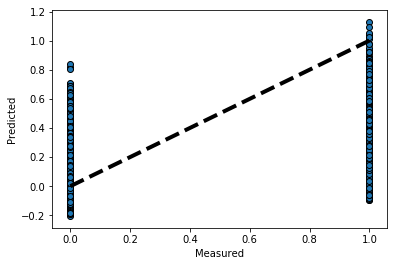

In [72]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### CAT Cross validation

In [73]:
CAT_cross = catboost.CatBoostRegressor(iterations=1600,  eval_metric='RMSE', **CAT_params)

In [74]:
y_pred = cross_val_predict(CAT_cross, x, y, cv=3)

0:	learn: 0.3141834	total: 348ms	remaining: 9m 16s
1:	learn: 0.3118596	total: 673ms	remaining: 8m 57s
2:	learn: 0.3096466	total: 965ms	remaining: 8m 33s
3:	learn: 0.3076636	total: 1.3s	remaining: 8m 37s
4:	learn: 0.3058999	total: 1.61s	remaining: 8m 35s
5:	learn: 0.3043187	total: 1.92s	remaining: 8m 29s
6:	learn: 0.3028962	total: 2.24s	remaining: 8m 28s
7:	learn: 0.3015371	total: 2.56s	remaining: 8m 29s
8:	learn: 0.3003294	total: 2.87s	remaining: 8m 27s
9:	learn: 0.2992583	total: 3.21s	remaining: 8m 29s
10:	learn: 0.2981887	total: 3.51s	remaining: 8m 26s
11:	learn: 0.2971906	total: 3.83s	remaining: 8m 26s
12:	learn: 0.2962468	total: 4.12s	remaining: 8m 23s
13:	learn: 0.2953677	total: 4.45s	remaining: 8m 23s
14:	learn: 0.2945354	total: 4.74s	remaining: 8m 20s
15:	learn: 0.2938310	total: 5.08s	remaining: 8m 22s
16:	learn: 0.2931132	total: 5.38s	remaining: 8m 20s
17:	learn: 0.2924698	total: 5.68s	remaining: 8m 19s
18:	learn: 0.2918569	total: 5.98s	remaining: 8m 17s
19:	learn: 0.2912450	to

158:	learn: 0.2598443	total: 50.1s	remaining: 7m 33s
159:	learn: 0.2597217	total: 50.4s	remaining: 7m 33s
160:	learn: 0.2595865	total: 50.7s	remaining: 7m 32s
161:	learn: 0.2594712	total: 51s	remaining: 7m 32s
162:	learn: 0.2593413	total: 51.3s	remaining: 7m 31s
163:	learn: 0.2592147	total: 51.6s	remaining: 7m 31s
164:	learn: 0.2590841	total: 51.9s	remaining: 7m 31s
165:	learn: 0.2589765	total: 52.2s	remaining: 7m 30s
166:	learn: 0.2588605	total: 52.5s	remaining: 7m 30s
167:	learn: 0.2587290	total: 52.8s	remaining: 7m 29s
168:	learn: 0.2585904	total: 53.1s	remaining: 7m 29s
169:	learn: 0.2584563	total: 53.4s	remaining: 7m 29s
170:	learn: 0.2583336	total: 53.7s	remaining: 7m 28s
171:	learn: 0.2582079	total: 54s	remaining: 7m 28s
172:	learn: 0.2580767	total: 54.3s	remaining: 7m 27s
173:	learn: 0.2579319	total: 54.6s	remaining: 7m 27s
174:	learn: 0.2578026	total: 54.9s	remaining: 7m 27s
175:	learn: 0.2576891	total: 55.2s	remaining: 7m 26s
176:	learn: 0.2575663	total: 55.5s	remaining: 7m 2

313:	learn: 0.2434989	total: 1m 38s	remaining: 6m 45s
314:	learn: 0.2434117	total: 1m 39s	remaining: 6m 44s
315:	learn: 0.2433247	total: 1m 39s	remaining: 6m 44s
316:	learn: 0.2432319	total: 1m 39s	remaining: 6m 44s
317:	learn: 0.2431634	total: 1m 40s	remaining: 6m 43s
318:	learn: 0.2430709	total: 1m 40s	remaining: 6m 43s
319:	learn: 0.2429992	total: 1m 40s	remaining: 6m 43s
320:	learn: 0.2429191	total: 1m 41s	remaining: 6m 42s
321:	learn: 0.2428388	total: 1m 41s	remaining: 6m 42s
322:	learn: 0.2427677	total: 1m 41s	remaining: 6m 41s
323:	learn: 0.2426924	total: 1m 41s	remaining: 6m 41s
324:	learn: 0.2426070	total: 1m 42s	remaining: 6m 41s
325:	learn: 0.2425214	total: 1m 42s	remaining: 6m 40s
326:	learn: 0.2424482	total: 1m 42s	remaining: 6m 40s
327:	learn: 0.2423697	total: 1m 43s	remaining: 6m 40s
328:	learn: 0.2422971	total: 1m 43s	remaining: 6m 39s
329:	learn: 0.2422220	total: 1m 43s	remaining: 6m 39s
330:	learn: 0.2421317	total: 1m 44s	remaining: 6m 39s
331:	learn: 0.2420554	total:

466:	learn: 0.2322352	total: 2m 31s	remaining: 6m 6s
467:	learn: 0.2321827	total: 2m 31s	remaining: 6m 6s
468:	learn: 0.2321231	total: 2m 31s	remaining: 6m 5s
469:	learn: 0.2320428	total: 2m 32s	remaining: 6m 5s
470:	learn: 0.2319688	total: 2m 32s	remaining: 6m 5s
471:	learn: 0.2318811	total: 2m 32s	remaining: 6m 4s
472:	learn: 0.2318086	total: 2m 33s	remaining: 6m 4s
473:	learn: 0.2317447	total: 2m 33s	remaining: 6m 4s
474:	learn: 0.2316842	total: 2m 33s	remaining: 6m 3s
475:	learn: 0.2316251	total: 2m 33s	remaining: 6m 3s
476:	learn: 0.2315684	total: 2m 34s	remaining: 6m 3s
477:	learn: 0.2314832	total: 2m 34s	remaining: 6m 3s
478:	learn: 0.2314134	total: 2m 35s	remaining: 6m 2s
479:	learn: 0.2313623	total: 2m 35s	remaining: 6m 2s
480:	learn: 0.2312830	total: 2m 35s	remaining: 6m 2s
481:	learn: 0.2312267	total: 2m 35s	remaining: 6m 1s
482:	learn: 0.2311661	total: 2m 36s	remaining: 6m 1s
483:	learn: 0.2311072	total: 2m 36s	remaining: 6m 1s
484:	learn: 0.2310515	total: 2m 36s	remaining:

620:	learn: 0.2224147	total: 3m 22s	remaining: 5m 19s
621:	learn: 0.2223358	total: 3m 23s	remaining: 5m 19s
622:	learn: 0.2222780	total: 3m 23s	remaining: 5m 18s
623:	learn: 0.2222230	total: 3m 23s	remaining: 5m 18s
624:	learn: 0.2221556	total: 3m 24s	remaining: 5m 18s
625:	learn: 0.2221028	total: 3m 24s	remaining: 5m 17s
626:	learn: 0.2220491	total: 3m 24s	remaining: 5m 17s
627:	learn: 0.2219956	total: 3m 25s	remaining: 5m 17s
628:	learn: 0.2219303	total: 3m 25s	remaining: 5m 17s
629:	learn: 0.2218693	total: 3m 25s	remaining: 5m 16s
630:	learn: 0.2218152	total: 3m 25s	remaining: 5m 16s
631:	learn: 0.2217502	total: 3m 26s	remaining: 5m 16s
632:	learn: 0.2217068	total: 3m 26s	remaining: 5m 15s
633:	learn: 0.2216562	total: 3m 26s	remaining: 5m 15s
634:	learn: 0.2215873	total: 3m 27s	remaining: 5m 14s
635:	learn: 0.2215298	total: 3m 27s	remaining: 5m 14s
636:	learn: 0.2214723	total: 3m 27s	remaining: 5m 14s
637:	learn: 0.2214313	total: 3m 28s	remaining: 5m 13s
638:	learn: 0.2213771	total:

774:	learn: 0.2140041	total: 4m 15s	remaining: 4m 32s
775:	learn: 0.2139585	total: 4m 15s	remaining: 4m 31s
776:	learn: 0.2139122	total: 4m 16s	remaining: 4m 31s
777:	learn: 0.2138584	total: 4m 16s	remaining: 4m 31s
778:	learn: 0.2138068	total: 4m 16s	remaining: 4m 30s
779:	learn: 0.2137576	total: 4m 17s	remaining: 4m 30s
780:	learn: 0.2137134	total: 4m 17s	remaining: 4m 30s
781:	learn: 0.2136626	total: 4m 17s	remaining: 4m 29s
782:	learn: 0.2136174	total: 4m 18s	remaining: 4m 29s
783:	learn: 0.2135456	total: 4m 18s	remaining: 4m 29s
784:	learn: 0.2134941	total: 4m 18s	remaining: 4m 28s
785:	learn: 0.2134307	total: 4m 19s	remaining: 4m 28s
786:	learn: 0.2133775	total: 4m 19s	remaining: 4m 28s
787:	learn: 0.2133272	total: 4m 19s	remaining: 4m 27s
788:	learn: 0.2132835	total: 4m 20s	remaining: 4m 27s
789:	learn: 0.2132462	total: 4m 20s	remaining: 4m 27s
790:	learn: 0.2131993	total: 4m 20s	remaining: 4m 26s
791:	learn: 0.2131491	total: 4m 21s	remaining: 4m 26s
792:	learn: 0.2130916	total:

928:	learn: 0.2063196	total: 5m 8s	remaining: 3m 43s
929:	learn: 0.2062729	total: 5m 9s	remaining: 3m 42s
930:	learn: 0.2062374	total: 5m 9s	remaining: 3m 42s
931:	learn: 0.2061901	total: 5m 9s	remaining: 3m 41s
932:	learn: 0.2061400	total: 5m 10s	remaining: 3m 41s
933:	learn: 0.2060909	total: 5m 10s	remaining: 3m 41s
934:	learn: 0.2060458	total: 5m 10s	remaining: 3m 40s
935:	learn: 0.2059935	total: 5m 11s	remaining: 3m 40s
936:	learn: 0.2059489	total: 5m 11s	remaining: 3m 40s
937:	learn: 0.2058944	total: 5m 11s	remaining: 3m 40s
938:	learn: 0.2058325	total: 5m 12s	remaining: 3m 39s
939:	learn: 0.2057928	total: 5m 12s	remaining: 3m 39s
940:	learn: 0.2057450	total: 5m 12s	remaining: 3m 39s
941:	learn: 0.2056931	total: 5m 13s	remaining: 3m 38s
942:	learn: 0.2056470	total: 5m 13s	remaining: 3m 38s
943:	learn: 0.2055922	total: 5m 14s	remaining: 3m 38s
944:	learn: 0.2055510	total: 5m 14s	remaining: 3m 37s
945:	learn: 0.2054965	total: 5m 14s	remaining: 3m 37s
946:	learn: 0.2054600	total: 5m 

1080:	learn: 0.1992599	total: 5m 58s	remaining: 2m 51s
1081:	learn: 0.1992204	total: 5m 58s	remaining: 2m 51s
1082:	learn: 0.1991818	total: 5m 58s	remaining: 2m 51s
1083:	learn: 0.1991396	total: 5m 59s	remaining: 2m 50s
1084:	learn: 0.1990954	total: 5m 59s	remaining: 2m 50s
1085:	learn: 0.1990614	total: 5m 59s	remaining: 2m 50s
1086:	learn: 0.1990209	total: 5m 59s	remaining: 2m 49s
1087:	learn: 0.1989705	total: 6m	remaining: 2m 49s
1088:	learn: 0.1989214	total: 6m	remaining: 2m 49s
1089:	learn: 0.1988783	total: 6m	remaining: 2m 48s
1090:	learn: 0.1988376	total: 6m 1s	remaining: 2m 48s
1091:	learn: 0.1988037	total: 6m 1s	remaining: 2m 48s
1092:	learn: 0.1987531	total: 6m 1s	remaining: 2m 47s
1093:	learn: 0.1986896	total: 6m 2s	remaining: 2m 47s
1094:	learn: 0.1986556	total: 6m 2s	remaining: 2m 47s
1095:	learn: 0.1986106	total: 6m 2s	remaining: 2m 46s
1096:	learn: 0.1985663	total: 6m 3s	remaining: 2m 46s
1097:	learn: 0.1985319	total: 6m 3s	remaining: 2m 46s
1098:	learn: 0.1984843	total: 

1231:	learn: 0.1928924	total: 6m 47s	remaining: 2m 1s
1232:	learn: 0.1928501	total: 6m 48s	remaining: 2m 1s
1233:	learn: 0.1928051	total: 6m 48s	remaining: 2m 1s
1234:	learn: 0.1927706	total: 6m 48s	remaining: 2m
1235:	learn: 0.1927250	total: 6m 49s	remaining: 2m
1236:	learn: 0.1926880	total: 6m 49s	remaining: 2m
1237:	learn: 0.1926442	total: 6m 49s	remaining: 1m 59s
1238:	learn: 0.1925916	total: 6m 50s	remaining: 1m 59s
1239:	learn: 0.1925443	total: 6m 50s	remaining: 1m 59s
1240:	learn: 0.1924868	total: 6m 50s	remaining: 1m 58s
1241:	learn: 0.1924397	total: 6m 51s	remaining: 1m 58s
1242:	learn: 0.1923933	total: 6m 51s	remaining: 1m 58s
1243:	learn: 0.1923668	total: 6m 51s	remaining: 1m 57s
1244:	learn: 0.1923143	total: 6m 52s	remaining: 1m 57s
1245:	learn: 0.1922762	total: 6m 52s	remaining: 1m 57s
1246:	learn: 0.1922275	total: 6m 52s	remaining: 1m 56s
1247:	learn: 0.1921902	total: 6m 53s	remaining: 1m 56s
1248:	learn: 0.1921576	total: 6m 53s	remaining: 1m 56s
1249:	learn: 0.1921049	to

1381:	learn: 0.1867346	total: 7m 37s	remaining: 1m 12s
1382:	learn: 0.1866975	total: 7m 37s	remaining: 1m 11s
1383:	learn: 0.1866582	total: 7m 37s	remaining: 1m 11s
1384:	learn: 0.1866053	total: 7m 37s	remaining: 1m 11s
1385:	learn: 0.1865791	total: 7m 38s	remaining: 1m 10s
1386:	learn: 0.1865435	total: 7m 38s	remaining: 1m 10s
1387:	learn: 0.1865199	total: 7m 38s	remaining: 1m 10s
1388:	learn: 0.1864829	total: 7m 39s	remaining: 1m 9s
1389:	learn: 0.1864455	total: 7m 39s	remaining: 1m 9s
1390:	learn: 0.1864145	total: 7m 39s	remaining: 1m 9s
1391:	learn: 0.1863678	total: 7m 40s	remaining: 1m 8s
1392:	learn: 0.1863212	total: 7m 40s	remaining: 1m 8s
1393:	learn: 0.1862726	total: 7m 40s	remaining: 1m 8s
1394:	learn: 0.1862378	total: 7m 41s	remaining: 1m 7s
1395:	learn: 0.1862162	total: 7m 41s	remaining: 1m 7s
1396:	learn: 0.1861625	total: 7m 41s	remaining: 1m 7s
1397:	learn: 0.1861265	total: 7m 42s	remaining: 1m 6s
1398:	learn: 0.1861040	total: 7m 42s	remaining: 1m 6s
1399:	learn: 0.186078

1534:	learn: 0.1806784	total: 8m 29s	remaining: 21.6s
1535:	learn: 0.1806282	total: 8m 29s	remaining: 21.2s
1536:	learn: 0.1805965	total: 8m 29s	remaining: 20.9s
1537:	learn: 0.1805514	total: 8m 30s	remaining: 20.6s
1538:	learn: 0.1805212	total: 8m 30s	remaining: 20.2s
1539:	learn: 0.1805033	total: 8m 30s	remaining: 19.9s
1540:	learn: 0.1804777	total: 8m 31s	remaining: 19.6s
1541:	learn: 0.1804432	total: 8m 31s	remaining: 19.2s
1542:	learn: 0.1803952	total: 8m 31s	remaining: 18.9s
1543:	learn: 0.1803664	total: 8m 32s	remaining: 18.6s
1544:	learn: 0.1803295	total: 8m 32s	remaining: 18.2s
1545:	learn: 0.1802946	total: 8m 32s	remaining: 17.9s
1546:	learn: 0.1802562	total: 8m 33s	remaining: 17.6s
1547:	learn: 0.1802123	total: 8m 33s	remaining: 17.2s
1548:	learn: 0.1801607	total: 8m 33s	remaining: 16.9s
1549:	learn: 0.1801086	total: 8m 34s	remaining: 16.6s
1550:	learn: 0.1800802	total: 8m 34s	remaining: 16.3s
1551:	learn: 0.1800277	total: 8m 34s	remaining: 15.9s
1552:	learn: 0.1799857	total

90:	learn: 0.2709348	total: 29.9s	remaining: 8m 15s
91:	learn: 0.2707381	total: 30.2s	remaining: 8m 14s
92:	learn: 0.2705570	total: 30.5s	remaining: 8m 13s
93:	learn: 0.2703722	total: 30.8s	remaining: 8m 13s
94:	learn: 0.2701823	total: 31.1s	remaining: 8m 12s
95:	learn: 0.2700023	total: 31.4s	remaining: 8m 12s
96:	learn: 0.2698028	total: 31.8s	remaining: 8m 12s
97:	learn: 0.2696071	total: 32.1s	remaining: 8m 12s
98:	learn: 0.2694669	total: 32.4s	remaining: 8m 11s
99:	learn: 0.2692906	total: 32.7s	remaining: 8m 10s
100:	learn: 0.2691099	total: 33s	remaining: 8m 9s
101:	learn: 0.2689371	total: 33.3s	remaining: 8m 9s
102:	learn: 0.2687774	total: 33.7s	remaining: 8m 9s
103:	learn: 0.2686182	total: 34s	remaining: 8m 9s
104:	learn: 0.2684586	total: 34.3s	remaining: 8m 8s
105:	learn: 0.2683018	total: 34.6s	remaining: 8m 8s
106:	learn: 0.2681288	total: 34.9s	remaining: 8m 7s
107:	learn: 0.2679686	total: 35.2s	remaining: 8m 6s
108:	learn: 0.2678038	total: 35.6s	remaining: 8m 6s
109:	learn: 0.26

246:	learn: 0.2505926	total: 1m 18s	remaining: 7m 12s
247:	learn: 0.2504807	total: 1m 19s	remaining: 7m 12s
248:	learn: 0.2503776	total: 1m 19s	remaining: 7m 11s
249:	learn: 0.2502876	total: 1m 19s	remaining: 7m 11s
250:	learn: 0.2501830	total: 1m 20s	remaining: 7m 10s
251:	learn: 0.2500899	total: 1m 20s	remaining: 7m 10s
252:	learn: 0.2499756	total: 1m 20s	remaining: 7m 10s
253:	learn: 0.2498745	total: 1m 21s	remaining: 7m 10s
254:	learn: 0.2497828	total: 1m 21s	remaining: 7m 9s
255:	learn: 0.2496905	total: 1m 21s	remaining: 7m 9s
256:	learn: 0.2495924	total: 1m 22s	remaining: 7m 9s
257:	learn: 0.2494852	total: 1m 22s	remaining: 7m 8s
258:	learn: 0.2493872	total: 1m 22s	remaining: 7m 8s
259:	learn: 0.2492857	total: 1m 23s	remaining: 7m 8s
260:	learn: 0.2491971	total: 1m 23s	remaining: 7m 7s
261:	learn: 0.2490990	total: 1m 23s	remaining: 7m 7s
262:	learn: 0.2490061	total: 1m 24s	remaining: 7m 7s
263:	learn: 0.2489141	total: 1m 24s	remaining: 7m 6s
264:	learn: 0.2488223	total: 1m 24s	re

400:	learn: 0.2375730	total: 2m 9s	remaining: 6m 27s
401:	learn: 0.2374994	total: 2m 10s	remaining: 6m 27s
402:	learn: 0.2374276	total: 2m 10s	remaining: 6m 27s
403:	learn: 0.2373452	total: 2m 10s	remaining: 6m 27s
404:	learn: 0.2372774	total: 2m 11s	remaining: 6m 27s
405:	learn: 0.2372161	total: 2m 11s	remaining: 6m 26s
406:	learn: 0.2371507	total: 2m 11s	remaining: 6m 26s
407:	learn: 0.2370859	total: 2m 12s	remaining: 6m 26s
408:	learn: 0.2370131	total: 2m 12s	remaining: 6m 26s
409:	learn: 0.2369470	total: 2m 12s	remaining: 6m 25s
410:	learn: 0.2368739	total: 2m 13s	remaining: 6m 25s
411:	learn: 0.2368185	total: 2m 13s	remaining: 6m 25s
412:	learn: 0.2367440	total: 2m 13s	remaining: 6m 24s
413:	learn: 0.2366746	total: 2m 14s	remaining: 6m 24s
414:	learn: 0.2366119	total: 2m 14s	remaining: 6m 24s
415:	learn: 0.2365488	total: 2m 14s	remaining: 6m 24s
416:	learn: 0.2364860	total: 2m 15s	remaining: 6m 23s
417:	learn: 0.2364186	total: 2m 15s	remaining: 6m 23s
418:	learn: 0.2363500	total: 

553:	learn: 0.2276101	total: 3m	remaining: 5m 39s
554:	learn: 0.2275565	total: 3m	remaining: 5m 39s
555:	learn: 0.2274871	total: 3m	remaining: 5m 39s
556:	learn: 0.2274334	total: 3m 1s	remaining: 5m 38s
557:	learn: 0.2273967	total: 3m 1s	remaining: 5m 38s
558:	learn: 0.2273381	total: 3m 1s	remaining: 5m 38s
559:	learn: 0.2272681	total: 3m 1s	remaining: 5m 37s
560:	learn: 0.2271926	total: 3m 2s	remaining: 5m 37s
561:	learn: 0.2271332	total: 3m 2s	remaining: 5m 37s
562:	learn: 0.2270770	total: 3m 2s	remaining: 5m 36s
563:	learn: 0.2270285	total: 3m 3s	remaining: 5m 36s
564:	learn: 0.2269517	total: 3m 3s	remaining: 5m 36s
565:	learn: 0.2268881	total: 3m 3s	remaining: 5m 36s
566:	learn: 0.2268399	total: 3m 4s	remaining: 5m 35s
567:	learn: 0.2267788	total: 3m 4s	remaining: 5m 35s
568:	learn: 0.2267276	total: 3m 4s	remaining: 5m 35s
569:	learn: 0.2266612	total: 3m 5s	remaining: 5m 34s
570:	learn: 0.2266007	total: 3m 5s	remaining: 5m 34s
571:	learn: 0.2265396	total: 3m 5s	remaining: 5m 34s
57

707:	learn: 0.2188635	total: 3m 49s	remaining: 4m 48s
708:	learn: 0.2188037	total: 3m 49s	remaining: 4m 48s
709:	learn: 0.2187427	total: 3m 49s	remaining: 4m 48s
710:	learn: 0.2186976	total: 3m 50s	remaining: 4m 47s
711:	learn: 0.2186416	total: 3m 50s	remaining: 4m 47s
712:	learn: 0.2185771	total: 3m 50s	remaining: 4m 47s
713:	learn: 0.2185308	total: 3m 51s	remaining: 4m 46s
714:	learn: 0.2184792	total: 3m 51s	remaining: 4m 46s
715:	learn: 0.2184197	total: 3m 51s	remaining: 4m 45s
716:	learn: 0.2183667	total: 3m 51s	remaining: 4m 45s
717:	learn: 0.2183150	total: 3m 52s	remaining: 4m 45s
718:	learn: 0.2182569	total: 3m 52s	remaining: 4m 44s
719:	learn: 0.2182144	total: 3m 52s	remaining: 4m 44s
720:	learn: 0.2181533	total: 3m 53s	remaining: 4m 44s
721:	learn: 0.2180871	total: 3m 53s	remaining: 4m 43s
722:	learn: 0.2180405	total: 3m 53s	remaining: 4m 43s
723:	learn: 0.2179830	total: 3m 54s	remaining: 4m 43s
724:	learn: 0.2179366	total: 3m 54s	remaining: 4m 42s
725:	learn: 0.2178926	total:

861:	learn: 0.2108973	total: 4m 37s	remaining: 3m 57s
862:	learn: 0.2108501	total: 4m 37s	remaining: 3m 57s
863:	learn: 0.2107791	total: 4m 38s	remaining: 3m 57s
864:	learn: 0.2107395	total: 4m 38s	remaining: 3m 56s
865:	learn: 0.2106992	total: 4m 38s	remaining: 3m 56s
866:	learn: 0.2106666	total: 4m 39s	remaining: 3m 56s
867:	learn: 0.2106164	total: 4m 39s	remaining: 3m 55s
868:	learn: 0.2105606	total: 4m 39s	remaining: 3m 55s
869:	learn: 0.2104940	total: 4m 40s	remaining: 3m 55s
870:	learn: 0.2104403	total: 4m 40s	remaining: 3m 54s
871:	learn: 0.2103971	total: 4m 40s	remaining: 3m 54s
872:	learn: 0.2103329	total: 4m 41s	remaining: 3m 54s
873:	learn: 0.2102887	total: 4m 41s	remaining: 3m 53s
874:	learn: 0.2102322	total: 4m 41s	remaining: 3m 53s
875:	learn: 0.2101675	total: 4m 42s	remaining: 3m 53s
876:	learn: 0.2101143	total: 4m 42s	remaining: 3m 52s
877:	learn: 0.2100773	total: 4m 42s	remaining: 3m 52s
878:	learn: 0.2100365	total: 4m 43s	remaining: 3m 52s
879:	learn: 0.2099894	total:

1014:	learn: 0.2034755	total: 5m 26s	remaining: 3m 8s
1015:	learn: 0.2034272	total: 5m 26s	remaining: 3m 7s
1016:	learn: 0.2033767	total: 5m 27s	remaining: 3m 7s
1017:	learn: 0.2033279	total: 5m 27s	remaining: 3m 7s
1018:	learn: 0.2032994	total: 5m 27s	remaining: 3m 6s
1019:	learn: 0.2032585	total: 5m 27s	remaining: 3m 6s
1020:	learn: 0.2032037	total: 5m 28s	remaining: 3m 6s
1021:	learn: 0.2031400	total: 5m 28s	remaining: 3m 5s
1022:	learn: 0.2030922	total: 5m 28s	remaining: 3m 5s
1023:	learn: 0.2030392	total: 5m 29s	remaining: 3m 5s
1024:	learn: 0.2030007	total: 5m 29s	remaining: 3m 4s
1025:	learn: 0.2029566	total: 5m 29s	remaining: 3m 4s
1026:	learn: 0.2029023	total: 5m 30s	remaining: 3m 4s
1027:	learn: 0.2028507	total: 5m 30s	remaining: 3m 3s
1028:	learn: 0.2027951	total: 5m 30s	remaining: 3m 3s
1029:	learn: 0.2027323	total: 5m 31s	remaining: 3m 3s
1030:	learn: 0.2026906	total: 5m 31s	remaining: 3m 2s
1031:	learn: 0.2026452	total: 5m 31s	remaining: 3m 2s
1032:	learn: 0.2026067	total

1165:	learn: 0.1966397	total: 6m 14s	remaining: 2m 19s
1166:	learn: 0.1965994	total: 6m 14s	remaining: 2m 18s
1167:	learn: 0.1965521	total: 6m 14s	remaining: 2m 18s
1168:	learn: 0.1965115	total: 6m 15s	remaining: 2m 18s
1169:	learn: 0.1964722	total: 6m 15s	remaining: 2m 17s
1170:	learn: 0.1964346	total: 6m 15s	remaining: 2m 17s
1171:	learn: 0.1963813	total: 6m 16s	remaining: 2m 17s
1172:	learn: 0.1963415	total: 6m 16s	remaining: 2m 17s
1173:	learn: 0.1963023	total: 6m 16s	remaining: 2m 16s
1174:	learn: 0.1962438	total: 6m 17s	remaining: 2m 16s
1175:	learn: 0.1961968	total: 6m 17s	remaining: 2m 16s
1176:	learn: 0.1961504	total: 6m 17s	remaining: 2m 15s
1177:	learn: 0.1961006	total: 6m 18s	remaining: 2m 15s
1178:	learn: 0.1960741	total: 6m 18s	remaining: 2m 15s
1179:	learn: 0.1960240	total: 6m 18s	remaining: 2m 14s
1180:	learn: 0.1959749	total: 6m 19s	remaining: 2m 14s
1181:	learn: 0.1959234	total: 6m 19s	remaining: 2m 14s
1182:	learn: 0.1958791	total: 6m 19s	remaining: 2m 13s
1183:	lear

1315:	learn: 0.1903182	total: 7m 1s	remaining: 1m 30s
1316:	learn: 0.1902773	total: 7m 1s	remaining: 1m 30s
1317:	learn: 0.1902275	total: 7m 1s	remaining: 1m 30s
1318:	learn: 0.1901681	total: 7m 2s	remaining: 1m 29s
1319:	learn: 0.1901122	total: 7m 2s	remaining: 1m 29s
1320:	learn: 0.1900913	total: 7m 2s	remaining: 1m 29s
1321:	learn: 0.1900589	total: 7m 3s	remaining: 1m 28s
1322:	learn: 0.1900180	total: 7m 3s	remaining: 1m 28s
1323:	learn: 0.1899640	total: 7m 3s	remaining: 1m 28s
1324:	learn: 0.1899200	total: 7m 4s	remaining: 1m 28s
1325:	learn: 0.1898906	total: 7m 4s	remaining: 1m 27s
1326:	learn: 0.1898499	total: 7m 4s	remaining: 1m 27s
1327:	learn: 0.1898071	total: 7m 5s	remaining: 1m 27s
1328:	learn: 0.1897693	total: 7m 5s	remaining: 1m 26s
1329:	learn: 0.1897354	total: 7m 5s	remaining: 1m 26s
1330:	learn: 0.1897207	total: 7m 5s	remaining: 1m 26s
1331:	learn: 0.1896811	total: 7m 6s	remaining: 1m 25s
1332:	learn: 0.1896365	total: 7m 6s	remaining: 1m 25s
1333:	learn: 0.1896038	total

1467:	learn: 0.1842580	total: 7m 49s	remaining: 42.2s
1468:	learn: 0.1842202	total: 7m 49s	remaining: 41.9s
1469:	learn: 0.1841810	total: 7m 49s	remaining: 41.6s
1470:	learn: 0.1841351	total: 7m 50s	remaining: 41.2s
1471:	learn: 0.1841021	total: 7m 50s	remaining: 40.9s
1472:	learn: 0.1840517	total: 7m 50s	remaining: 40.6s
1473:	learn: 0.1839988	total: 7m 51s	remaining: 40.3s
1474:	learn: 0.1839676	total: 7m 51s	remaining: 40s
1475:	learn: 0.1839075	total: 7m 51s	remaining: 39.6s
1476:	learn: 0.1838719	total: 7m 52s	remaining: 39.3s
1477:	learn: 0.1838312	total: 7m 52s	remaining: 39s
1478:	learn: 0.1838011	total: 7m 52s	remaining: 38.7s
1479:	learn: 0.1837539	total: 7m 53s	remaining: 38.4s
1480:	learn: 0.1837317	total: 7m 53s	remaining: 38s
1481:	learn: 0.1837096	total: 7m 53s	remaining: 37.7s
1482:	learn: 0.1836770	total: 7m 53s	remaining: 37.4s
1483:	learn: 0.1836347	total: 7m 54s	remaining: 37.1s
1484:	learn: 0.1835952	total: 7m 54s	remaining: 36.8s
1485:	learn: 0.1835473	total: 7m 5

22:	learn: 0.2891033	total: 7.07s	remaining: 8m 4s
23:	learn: 0.2886519	total: 7.37s	remaining: 8m 4s
24:	learn: 0.2881991	total: 7.67s	remaining: 8m 3s
25:	learn: 0.2877352	total: 7.96s	remaining: 8m 2s
26:	learn: 0.2872779	total: 8.25s	remaining: 8m
27:	learn: 0.2868535	total: 8.54s	remaining: 7m 59s
28:	learn: 0.2864554	total: 8.85s	remaining: 7m 59s
29:	learn: 0.2861073	total: 9.15s	remaining: 7m 58s
30:	learn: 0.2857139	total: 9.47s	remaining: 7m 59s
31:	learn: 0.2853320	total: 9.79s	remaining: 7m 59s
32:	learn: 0.2849535	total: 10.1s	remaining: 7m 58s
33:	learn: 0.2845509	total: 10.4s	remaining: 7m 57s
34:	learn: 0.2842274	total: 10.7s	remaining: 7m 57s
35:	learn: 0.2838543	total: 11s	remaining: 7m 56s
36:	learn: 0.2835071	total: 11.3s	remaining: 7m 55s
37:	learn: 0.2831556	total: 11.5s	remaining: 7m 54s
38:	learn: 0.2828353	total: 11.8s	remaining: 7m 53s
39:	learn: 0.2825207	total: 12.1s	remaining: 7m 52s
40:	learn: 0.2821805	total: 12.4s	remaining: 7m 53s
41:	learn: 0.2818749	t

179:	learn: 0.2573764	total: 55.4s	remaining: 7m 16s
180:	learn: 0.2572425	total: 55.7s	remaining: 7m 16s
181:	learn: 0.2571236	total: 56s	remaining: 7m 16s
182:	learn: 0.2569965	total: 56.3s	remaining: 7m 15s
183:	learn: 0.2568702	total: 56.6s	remaining: 7m 15s
184:	learn: 0.2567634	total: 56.9s	remaining: 7m 15s
185:	learn: 0.2566575	total: 57.2s	remaining: 7m 14s
186:	learn: 0.2565428	total: 57.5s	remaining: 7m 14s
187:	learn: 0.2564250	total: 57.8s	remaining: 7m 14s
188:	learn: 0.2562872	total: 58.1s	remaining: 7m 13s
189:	learn: 0.2561560	total: 58.4s	remaining: 7m 13s
190:	learn: 0.2560411	total: 58.8s	remaining: 7m 13s
191:	learn: 0.2559131	total: 59.1s	remaining: 7m 13s
192:	learn: 0.2557987	total: 59.4s	remaining: 7m 12s
193:	learn: 0.2556891	total: 59.7s	remaining: 7m 12s
194:	learn: 0.2555529	total: 60s	remaining: 7m 12s
195:	learn: 0.2554420	total: 1m	remaining: 7m 11s
196:	learn: 0.2553098	total: 1m	remaining: 7m 11s
197:	learn: 0.2551895	total: 1m	remaining: 7m 11s
198:	l

333:	learn: 0.2422213	total: 1m 42s	remaining: 6m 29s
334:	learn: 0.2421470	total: 1m 42s	remaining: 6m 28s
335:	learn: 0.2420503	total: 1m 43s	remaining: 6m 28s
336:	learn: 0.2419585	total: 1m 43s	remaining: 6m 28s
337:	learn: 0.2418761	total: 1m 43s	remaining: 6m 28s
338:	learn: 0.2417868	total: 1m 44s	remaining: 6m 27s
339:	learn: 0.2417141	total: 1m 44s	remaining: 6m 27s
340:	learn: 0.2416283	total: 1m 44s	remaining: 6m 27s
341:	learn: 0.2415467	total: 1m 45s	remaining: 6m 26s
342:	learn: 0.2414782	total: 1m 45s	remaining: 6m 26s
343:	learn: 0.2413860	total: 1m 45s	remaining: 6m 26s
344:	learn: 0.2413151	total: 1m 46s	remaining: 6m 26s
345:	learn: 0.2412394	total: 1m 46s	remaining: 6m 25s
346:	learn: 0.2411573	total: 1m 46s	remaining: 6m 25s
347:	learn: 0.2410799	total: 1m 47s	remaining: 6m 25s
348:	learn: 0.2409995	total: 1m 47s	remaining: 6m 24s
349:	learn: 0.2409206	total: 1m 47s	remaining: 6m 24s
350:	learn: 0.2408452	total: 1m 48s	remaining: 6m 24s
351:	learn: 0.2407667	total:

487:	learn: 0.2311727	total: 2m 30s	remaining: 5m 43s
488:	learn: 0.2311059	total: 2m 30s	remaining: 5m 42s
489:	learn: 0.2310538	total: 2m 31s	remaining: 5m 42s
490:	learn: 0.2309845	total: 2m 31s	remaining: 5m 42s
491:	learn: 0.2309192	total: 2m 31s	remaining: 5m 41s
492:	learn: 0.2308697	total: 2m 32s	remaining: 5m 41s
493:	learn: 0.2308199	total: 2m 32s	remaining: 5m 41s
494:	learn: 0.2307610	total: 2m 32s	remaining: 5m 40s
495:	learn: 0.2306879	total: 2m 32s	remaining: 5m 40s
496:	learn: 0.2306365	total: 2m 33s	remaining: 5m 40s
497:	learn: 0.2305629	total: 2m 33s	remaining: 5m 39s
498:	learn: 0.2304885	total: 2m 33s	remaining: 5m 39s
499:	learn: 0.2304285	total: 2m 34s	remaining: 5m 39s
500:	learn: 0.2303444	total: 2m 34s	remaining: 5m 39s
501:	learn: 0.2302763	total: 2m 34s	remaining: 5m 38s
502:	learn: 0.2302114	total: 2m 35s	remaining: 5m 38s
503:	learn: 0.2301340	total: 2m 35s	remaining: 5m 38s
504:	learn: 0.2300707	total: 2m 35s	remaining: 5m 37s
505:	learn: 0.2300129	total:

641:	learn: 0.2216844	total: 3m 18s	remaining: 4m 56s
642:	learn: 0.2216236	total: 3m 19s	remaining: 4m 56s
643:	learn: 0.2215567	total: 3m 19s	remaining: 4m 56s
644:	learn: 0.2214968	total: 3m 19s	remaining: 4m 55s
645:	learn: 0.2214382	total: 3m 20s	remaining: 4m 55s
646:	learn: 0.2213853	total: 3m 20s	remaining: 4m 55s
647:	learn: 0.2213305	total: 3m 20s	remaining: 4m 54s
648:	learn: 0.2212820	total: 3m 21s	remaining: 4m 54s
649:	learn: 0.2212253	total: 3m 21s	remaining: 4m 54s
650:	learn: 0.2211733	total: 3m 21s	remaining: 4m 53s
651:	learn: 0.2211101	total: 3m 21s	remaining: 4m 53s
652:	learn: 0.2210526	total: 3m 22s	remaining: 4m 53s
653:	learn: 0.2210004	total: 3m 22s	remaining: 4m 53s
654:	learn: 0.2209373	total: 3m 22s	remaining: 4m 52s
655:	learn: 0.2208858	total: 3m 23s	remaining: 4m 52s
656:	learn: 0.2208396	total: 3m 23s	remaining: 4m 52s
657:	learn: 0.2207803	total: 3m 23s	remaining: 4m 51s
658:	learn: 0.2207141	total: 3m 24s	remaining: 4m 51s
659:	learn: 0.2206556	total:

794:	learn: 0.2134191	total: 4m 6s	remaining: 4m 9s
795:	learn: 0.2133766	total: 4m 7s	remaining: 4m 9s
796:	learn: 0.2133288	total: 4m 7s	remaining: 4m 9s
797:	learn: 0.2132903	total: 4m 7s	remaining: 4m 8s
798:	learn: 0.2132375	total: 4m 7s	remaining: 4m 8s
799:	learn: 0.2132005	total: 4m 8s	remaining: 4m 8s
800:	learn: 0.2131507	total: 4m 8s	remaining: 4m 7s
801:	learn: 0.2131099	total: 4m 8s	remaining: 4m 7s
802:	learn: 0.2130655	total: 4m 9s	remaining: 4m 7s
803:	learn: 0.2130161	total: 4m 9s	remaining: 4m 7s
804:	learn: 0.2129733	total: 4m 9s	remaining: 4m 6s
805:	learn: 0.2129087	total: 4m 10s	remaining: 4m 6s
806:	learn: 0.2128575	total: 4m 10s	remaining: 4m 6s
807:	learn: 0.2127932	total: 4m 10s	remaining: 4m 5s
808:	learn: 0.2127442	total: 4m 11s	remaining: 4m 5s
809:	learn: 0.2126988	total: 4m 11s	remaining: 4m 5s
810:	learn: 0.2126561	total: 4m 11s	remaining: 4m 4s
811:	learn: 0.2126069	total: 4m 11s	remaining: 4m 4s
812:	learn: 0.2125679	total: 4m 12s	remaining: 4m 4s
813:

947:	learn: 0.2059674	total: 4m 54s	remaining: 3m 22s
948:	learn: 0.2059020	total: 4m 54s	remaining: 3m 22s
949:	learn: 0.2058558	total: 4m 55s	remaining: 3m 21s
950:	learn: 0.2058054	total: 4m 55s	remaining: 3m 21s
951:	learn: 0.2057638	total: 4m 55s	remaining: 3m 21s
952:	learn: 0.2057092	total: 4m 55s	remaining: 3m 20s
953:	learn: 0.2056726	total: 4m 56s	remaining: 3m 20s
954:	learn: 0.2056317	total: 4m 56s	remaining: 3m 20s
955:	learn: 0.2055835	total: 4m 56s	remaining: 3m 19s
956:	learn: 0.2055257	total: 4m 57s	remaining: 3m 19s
957:	learn: 0.2054700	total: 4m 57s	remaining: 3m 19s
958:	learn: 0.2054227	total: 4m 57s	remaining: 3m 19s
959:	learn: 0.2053865	total: 4m 58s	remaining: 3m 18s
960:	learn: 0.2053554	total: 4m 58s	remaining: 3m 18s
961:	learn: 0.2053091	total: 4m 58s	remaining: 3m 18s
962:	learn: 0.2052538	total: 4m 59s	remaining: 3m 17s
963:	learn: 0.2052183	total: 4m 59s	remaining: 3m 17s
964:	learn: 0.2051749	total: 4m 59s	remaining: 3m 17s
965:	learn: 0.2051349	total:

1099:	learn: 0.1990422	total: 5m 41s	remaining: 2m 35s
1100:	learn: 0.1990030	total: 5m 41s	remaining: 2m 34s
1101:	learn: 0.1989679	total: 5m 42s	remaining: 2m 34s
1102:	learn: 0.1989311	total: 5m 42s	remaining: 2m 34s
1103:	learn: 0.1988822	total: 5m 42s	remaining: 2m 34s
1104:	learn: 0.1988368	total: 5m 43s	remaining: 2m 33s
1105:	learn: 0.1988045	total: 5m 43s	remaining: 2m 33s
1106:	learn: 0.1987781	total: 5m 43s	remaining: 2m 33s
1107:	learn: 0.1987286	total: 5m 44s	remaining: 2m 32s
1108:	learn: 0.1986864	total: 5m 44s	remaining: 2m 32s
1109:	learn: 0.1986498	total: 5m 44s	remaining: 2m 32s
1110:	learn: 0.1986016	total: 5m 45s	remaining: 2m 31s
1111:	learn: 0.1985524	total: 5m 45s	remaining: 2m 31s
1112:	learn: 0.1985192	total: 5m 45s	remaining: 2m 31s
1113:	learn: 0.1984785	total: 5m 45s	remaining: 2m 30s
1114:	learn: 0.1984368	total: 5m 46s	remaining: 2m 30s
1115:	learn: 0.1983968	total: 5m 46s	remaining: 2m 30s
1116:	learn: 0.1983622	total: 5m 46s	remaining: 2m 29s
1117:	lear

1250:	learn: 0.1924685	total: 6m 28s	remaining: 1m 48s
1251:	learn: 0.1924321	total: 6m 29s	remaining: 1m 48s
1252:	learn: 0.1923897	total: 6m 29s	remaining: 1m 47s
1253:	learn: 0.1923671	total: 6m 29s	remaining: 1m 47s
1254:	learn: 0.1923213	total: 6m 30s	remaining: 1m 47s
1255:	learn: 0.1922790	total: 6m 30s	remaining: 1m 46s
1256:	learn: 0.1922337	total: 6m 30s	remaining: 1m 46s
1257:	learn: 0.1921889	total: 6m 30s	remaining: 1m 46s
1258:	learn: 0.1921549	total: 6m 31s	remaining: 1m 45s
1259:	learn: 0.1921016	total: 6m 31s	remaining: 1m 45s
1260:	learn: 0.1920722	total: 6m 31s	remaining: 1m 45s
1261:	learn: 0.1920220	total: 6m 32s	remaining: 1m 45s
1262:	learn: 0.1919834	total: 6m 32s	remaining: 1m 44s
1263:	learn: 0.1919282	total: 6m 32s	remaining: 1m 44s
1264:	learn: 0.1918801	total: 6m 33s	remaining: 1m 44s
1265:	learn: 0.1918402	total: 6m 33s	remaining: 1m 43s
1266:	learn: 0.1918066	total: 6m 33s	remaining: 1m 43s
1267:	learn: 0.1917518	total: 6m 34s	remaining: 1m 43s
1268:	lear

1401:	learn: 0.1863088	total: 7m 16s	remaining: 1m 1s
1402:	learn: 0.1862701	total: 7m 16s	remaining: 1m 1s
1403:	learn: 0.1862432	total: 7m 16s	remaining: 1m
1404:	learn: 0.1862142	total: 7m 16s	remaining: 1m
1405:	learn: 0.1861736	total: 7m 17s	remaining: 1m
1406:	learn: 0.1861299	total: 7m 17s	remaining: 1m
1407:	learn: 0.1860964	total: 7m 17s	remaining: 59.7s
1408:	learn: 0.1860630	total: 7m 18s	remaining: 59.4s
1409:	learn: 0.1860209	total: 7m 18s	remaining: 59.1s
1410:	learn: 0.1859822	total: 7m 18s	remaining: 58.8s
1411:	learn: 0.1859366	total: 7m 19s	remaining: 58.5s
1412:	learn: 0.1859040	total: 7m 19s	remaining: 58.2s
1413:	learn: 0.1858483	total: 7m 19s	remaining: 57.8s
1414:	learn: 0.1857894	total: 7m 20s	remaining: 57.5s
1415:	learn: 0.1857403	total: 7m 20s	remaining: 57.2s
1416:	learn: 0.1857043	total: 7m 20s	remaining: 56.9s
1417:	learn: 0.1856797	total: 7m 20s	remaining: 56.6s
1418:	learn: 0.1856470	total: 7m 21s	remaining: 56.3s
1419:	learn: 0.1856101	total: 7m 21s	rem

1554:	learn: 0.1805172	total: 8m 3s	remaining: 14s
1555:	learn: 0.1804670	total: 8m 4s	remaining: 13.7s
1556:	learn: 0.1804234	total: 8m 4s	remaining: 13.4s
1557:	learn: 0.1803916	total: 8m 4s	remaining: 13.1s
1558:	learn: 0.1803501	total: 8m 4s	remaining: 12.8s
1559:	learn: 0.1803059	total: 8m 5s	remaining: 12.4s
1560:	learn: 0.1802587	total: 8m 5s	remaining: 12.1s
1561:	learn: 0.1802176	total: 8m 5s	remaining: 11.8s
1562:	learn: 0.1801863	total: 8m 6s	remaining: 11.5s
1563:	learn: 0.1801414	total: 8m 6s	remaining: 11.2s
1564:	learn: 0.1800998	total: 8m 6s	remaining: 10.9s
1565:	learn: 0.1800592	total: 8m 7s	remaining: 10.6s
1566:	learn: 0.1800141	total: 8m 7s	remaining: 10.3s
1567:	learn: 0.1799833	total: 8m 7s	remaining: 9.95s
1568:	learn: 0.1799645	total: 8m 8s	remaining: 9.64s
1569:	learn: 0.1799287	total: 8m 8s	remaining: 9.33s
1570:	learn: 0.1798634	total: 8m 8s	remaining: 9.02s
1571:	learn: 0.1798343	total: 8m 9s	remaining: 8.71s
1572:	learn: 0.1797951	total: 8m 9s	remaining: 8

In [75]:
roc_test = roc_auc_score(y, y_pred.clip(0, 1))
print(roc_test)

0.8874720282993407


### Feature engineering

Train & Test data

In [ ]:
max_date = df_train['first_active_month'].dt.date.max()

def process_main(df):
    date_parts = ["year", "weekday", "month"]
    for part in date_parts:
        part_col = 'first_active_month' + "_" + part
        df[part_col] = getattr(df['first_active_month'].dt, part).astype(int)
            
    df['elapsed_time'] = (max_date - df['first_active_month'].dt.date).dt.days
    
    return df

df_train = process_main(df_train)
df_test = process_main(df_test)

Historical Transactions

In [ ]:
import numpy as np
import datetime

def aggregate_historical_transactions(trans, prefix):
    # more features from this kernel: https://www.kaggle.com/chauhuynh/my-first-kernel-3-699
    trans['purchase_month'] = trans['purchase_date'].dt.month
    trans['month_diff'] = ((datetime.datetime.today() - trans['purchase_date']).dt.days)//30
    trans['month_diff'] += trans['month_lag']
    trans.loc[:, 'purchase_date'] = pd.DatetimeIndex(trans['purchase_date']). \
                                        astype(np.int64) * 1e-9
    trans['installments'] = trans['installments'].astype(int)

    trans = pd.get_dummies(trans, columns=['category_2', 'category_3'])
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'category_1': ['sum', 'mean'],
        'category_2_1.0': ['mean', 'sum'],
        'category_2_2.0': ['mean', 'sum'],
        'category_2_3.0': ['mean', 'sum'],
        'category_2_4.0': ['mean', 'sum'],
        'category_2_5.0': ['mean', 'sum'],
        'category_3_1': ['sum', 'mean'],
        'category_3_2': ['sum', 'mean'],
        'category_3_3': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
        'installments': ['sum', 'mean', 'max', 'min', 'std'],
        'purchase_month': ['mean', 'max', 'min', 'std'],
        'purchase_date': [np.ptp, 'max', 'min'],
        'month_lag': ['min', 'max'],
        'merchant_category_id': ['nunique'],
        'state_id': ['nunique'],
        'subsector_id': ['nunique'],
        'city_id': ['nunique'],
        'month_diff': ['min', 'max', 'mean']
    }
    agg_trans = trans.groupby(['card_id']).agg(agg_func)
    agg_trans.columns = [prefix + '_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (trans.groupby('card_id')
          .size()
          .reset_index(name='{}transactions_count'.format(prefix)))

    agg_trans = pd.merge(df, agg_trans, on='card_id', how='left')

    return agg_trans

In [ ]:
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_lag'])
    history['installments'] = history['installments'].astype(int)
    agg_func = {
            'purchase_amount': ['count', 'sum', 'mean', 'min', 'max', 'std'],
            'installments': ['count', 'sum', 'mean', 'min', 'max', 'std'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)

    final_group = intermediate_group.groupby('card_id').agg(['mean', 'std'])
    final_group.columns = ['_'.join(col).strip() for col in final_group.columns.values]
    final_group.reset_index(inplace=True)
    
    return final_group

final_group = aggregate_per_month(df_historical_transactions) 

In [ ]:
history = aggregate_historical_transactions(df_historical_transactions, prefix='hist_')

In [ ]:
df_train = pd.merge(df_train, history, on='card_id', how='left')
df_test = pd.merge(df_test, history, on='card_id', how='left')
del history

In [ ]:
import gc

del df_historical_transactions
gc.collect()

In [ ]:
df_train = pd.merge(df_train, final_group, on='card_id')
df_test = pd.merge(df_test, final_group, on='card_id')
gc.collect()
del final_group

New Merchant Transactions

In [ ]:
def aggregate_new_transactions(trans, prefix):
    trans['purchase_month'] = trans['purchase_date'].dt.month
    trans['year'] = trans['purchase_date'].dt.year
    trans['weekofyear'] = trans['purchase_date'].dt.weekofyear
    trans['month'] = trans['purchase_date'].dt.month
    trans['dayofweek'] = trans['purchase_date'].dt.dayofweek
    trans['weekend'] = (trans.purchase_date.dt.weekday >=5).astype(int)
    trans['hour'] = trans['purchase_date'].dt.hour
    trans['installments'] = trans['installments'].astype(int)
    trans['month_diff'] = ((datetime.datetime.today() - trans['purchase_date']).dt.days)//30
    trans['month_diff'] += trans['month_lag']

    trans.loc[:, 'purchase_date'] = pd.DatetimeIndex(trans['purchase_date']).astype(np.int64) * 1e-9
    trans['installments'] = trans['installments'].astype(int)
    trans = pd.get_dummies(trans, columns=['category_2', 'category_3'])
    agg_func = {
        'category_1': ['sum', 'mean'],
        'category_2_1.0': ['mean', 'sum'],
        'category_2_2.0': ['mean', 'sum'],
        'category_2_3.0': ['mean', 'sum'],
        'category_2_4.0': ['mean', 'sum'],
        'category_2_5.0': ['mean', 'sum'],
        'category_3_1': ['sum', 'mean'],
        'category_3_2': ['sum', 'mean'],
        'category_3_3': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
        'installments': ['sum', 'mean', 'max', 'min', 'std'],
        'purchase_month': ['mean', 'max', 'min', 'std'],
        'purchase_date': [np.ptp, 'max', 'min'],
        'month_lag': ['min', 'max'],
        'merchant_category_id': ['nunique'],
        'state_id': ['nunique'],
        'subsector_id': ['nunique'],
        'city_id': ['nunique'],
    }
    agg_trans = trans.groupby(['card_id']).agg(agg_func)
    agg_trans.columns = [prefix + '_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (trans.groupby('card_id')
          .size()
          .reset_index(name='{}transactions_count'.format(prefix)))

    agg_trans = pd.merge(df, agg_trans, on='card_id', how='left')

    return agg_trans

In [ ]:
%%time
gc.collect()
new_history = aggregate_new_transactions(df_new_merchant_transactions, prefix='new')
del df_new_merchant_transactions
gc.collect()
df_train = pd.merge(df_train, new_history, on='card_id', how='left')
df_test = pd.merge(df_test, new_history, on='card_id', how='left')
del new_history
gc.collect()

In [ ]:
df_train.to_pickle('./df_train.pkl')
df_test.to_pickle('./df_test.pkl')


In [ ]:
df_train = pd.read_pickle('./df_train.pkl')
df_test = pd.read_pickle('./df_test.pkl')

### Define models and evaluate

In [ ]:
df_train.head()

In [ ]:
for col in df_train.columns:
    if df_train[col].isnull().any():
        df_train[col] = df_train[col].fillna(0)

In [ ]:
for col in df_test.columns:
    if df_test[col].isnull().any():
        df_test[col] = df_test[col].fillna(0)

In [ ]:
y = df_train['target']

In [ ]:
col_to_drop = ['first_active_month', 'card_id', 'target']

In [ ]:
for col in col_to_drop:
    if col in df_train.columns:
        df_train.drop([col], axis=1, inplace=True)
    if col in df_test.columns:
        df_test.drop([col], axis=1, inplace=True)

In [ ]:
df_train['feature_3'] = df_train['feature_3'].astype(int)
df_test['feature_3'] = df_test['feature_3'].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_feats = ['feature_1', 'feature_2']

for col in categorical_feats:
    lbl = LabelEncoder()
    lbl.fit(list(df_train[col].values.astype('str')) + list(df_test[col].values.astype('str')))
    df_train[col] = lbl.transform(list(df_train[col].values.astype('str')))
    df_test[col] = lbl.transform(list(df_test[col].values.astype('str')))

In [ ]:
df_train.head()

In [ ]:
#for col in ['newpurchase_amount_max', 'newpurchase_date_max', 'purchase_amount_max_mean']:
#    df_train[col + '_to_mean'] = df_train[col] / df_train[col].mean()
#    df_test[col + '_to_mean'] = df_test[col] / df_test[col].mean()

#### Basic LGB model

In [ ]:
X = df_train
X_test = df_test

import sklearn
print(sklearn.__version__)

In [ ]:
from sklearn.model_selection import KFold

n_fold = 9
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
import lightgbm as lgb
import catboost
import seaborn as sns 
import time

def train_model(X=X, X_test=X_test, y=y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False):

    oof = np.zeros(len(X))
    prediction = np.zeros(len(X_test))
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=1000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'cat':
            model = catboost.CatBoostRegressor(iterations=4000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=True, plot=True)
            plt.plot()
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
            
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12))
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
            plt.title('LGB Features (avg over folds)')
            plt.show()
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

In [ ]:
params = {'num_leaves': 50,
         'min_data_in_leaf': 70,
         'objective': 'regression',
         'max_depth': 13,
         'learning_rate': 0.008,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 7,
         "bagging_fraction": 0.8,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         'min_child_weight': 5,
         'reg_alpha': 1.15,
         'reg_lambda': 0.25,
         'subsample': 0.80,}

In [ ]:
# does not consider new_merchant_transaction  or merchant data
# CV mean score: 3.7437, std: 0.0589, 'max_depth': 18, 'learning_rate': 0.018545526395058548, n_fold = 5
# CV mean score: 3.7445, std: 0.0583, 'max_depth': 18, 'learning_rate': 0.03, n_fold = 5
# CV mean score: 3.7436, std: 0.0585, 'max_depth': 12, 'learning_rate': 0.03, n_fold = 5
# CV mean score: 3.7426, std: 0.0575, 'max_depth': 12, 'learning_rate': 0.01, n_fold = 5
# CV mean score: 3.7424, std: 0.0583, 'max_depth': 12, 'learning_rate': 0.005, n_fold = 5
# CV mean score: 3.7405, std: 0.1007, 'max_depth': 12, 'learning_rate': 0.0075, n_fold = 9

# does not consider merchant data
# CV mean score: 3.6572, std: 0.1065, 'max_depth': 12, 'learning_rate': 0.0075, n_fold = 9


oof_lgb, prediction_lgb, feature_importance = train_model(params=params, model_type='lgb', plot_feature_importance=True)


In [ ]:
# lgb.csv does not consider new_merchant_transaction  or merchant data
# lgb1.csv does not consider merchant data

submission = pd.read_csv('./input/sample_submission.csv')
submission['target'] = prediction_lgb
submission.to_csv('lgb_last.csv', index=False)


In [ ]:
# 100 iterations CV mean score: 3.6810, std: 0.0680. learning_rate': 0.05, depth': 7, l2_leaf_reg': 8, 'od_wait': 10,
# 1000 iterations CV mean score: 3.6670, std: 0.0658. learning_rate': 0.05, depth': 7, l2_leaf_reg': 8, 'od_wait': 10,
# 1000 iterations CV mean score: 3.6666, std: 0.0680. learning_rate': 0.03, depth': 9, l2_leaf_reg': 8, 'od_wait': 10,
# 5000 iterations CV mean score: 3.6671, std: 0.0689. learning_rate': 0.04, depth': 7, l2_leaf_reg': 8, 'od_wait': 10,
# 200 iterations CV mean score: 3.6679, std: 0.0592. learning_rate': 0.05, depth': 8, l2_leaf_reg': 10, 'od_wait': 10,
# 700 iterations CV mean score: 3.6677, std: 0.0572. learning_rate': 0.04, depth': 10, l2_leaf_reg': 10, 'od_wait': 10,
# 300 iterations CV mean score: 3.6699, std: 0.1182. learning_rate': 0.03, depth': 7, l2_leaf_reg': 7, 'od_wait': 10,
# 1000 iterations CV mean score: 3.6670, std: 0.105. learning_rate': 0.04, depth': 8, l2_leaf_reg': 8, 'od_wait': 10,

cat_params = {'learning_rate': 0.03,
              'depth': 9,
              'l2_leaf_reg': 8,
              'bootstrap_type': 'Bernoulli',
              'od_type': 'Iter',
              'od_wait': 10,
              'random_seed': 11,
              'allow_writing_files': False}
oof_cat, prediction_cat = train_model(params=cat_params, model_type='cat')

In [ ]:
submission['target'] = prediction_cat
submission.to_csv('cat_last.csv', index=False)

In [ ]:
submission['target'] = (prediction_lgb + prediction_cat) / 2
submission.to_csv('blend_last.csv', index=False)

Let's stack the results

In [ ]:
train_stack = np.vstack([oof_lgb, oof_cat]).transpose()
train_stack = pd.DataFrame(train_stack)
test_stack = np.vstack([prediction_lgb, prediction_cat]).transpose()
test_stack = pd.DataFrame(test_stack)

In [ ]:
oof_lgb_stack, prediction_lgb_stack = train_model(X=train_stack, X_test=test_stack, params=params, model_type='lgb')

In [ ]:
submission['target'] = prediction_lgb_stack
submission.to_csv('stacker_last.csv', index=False)